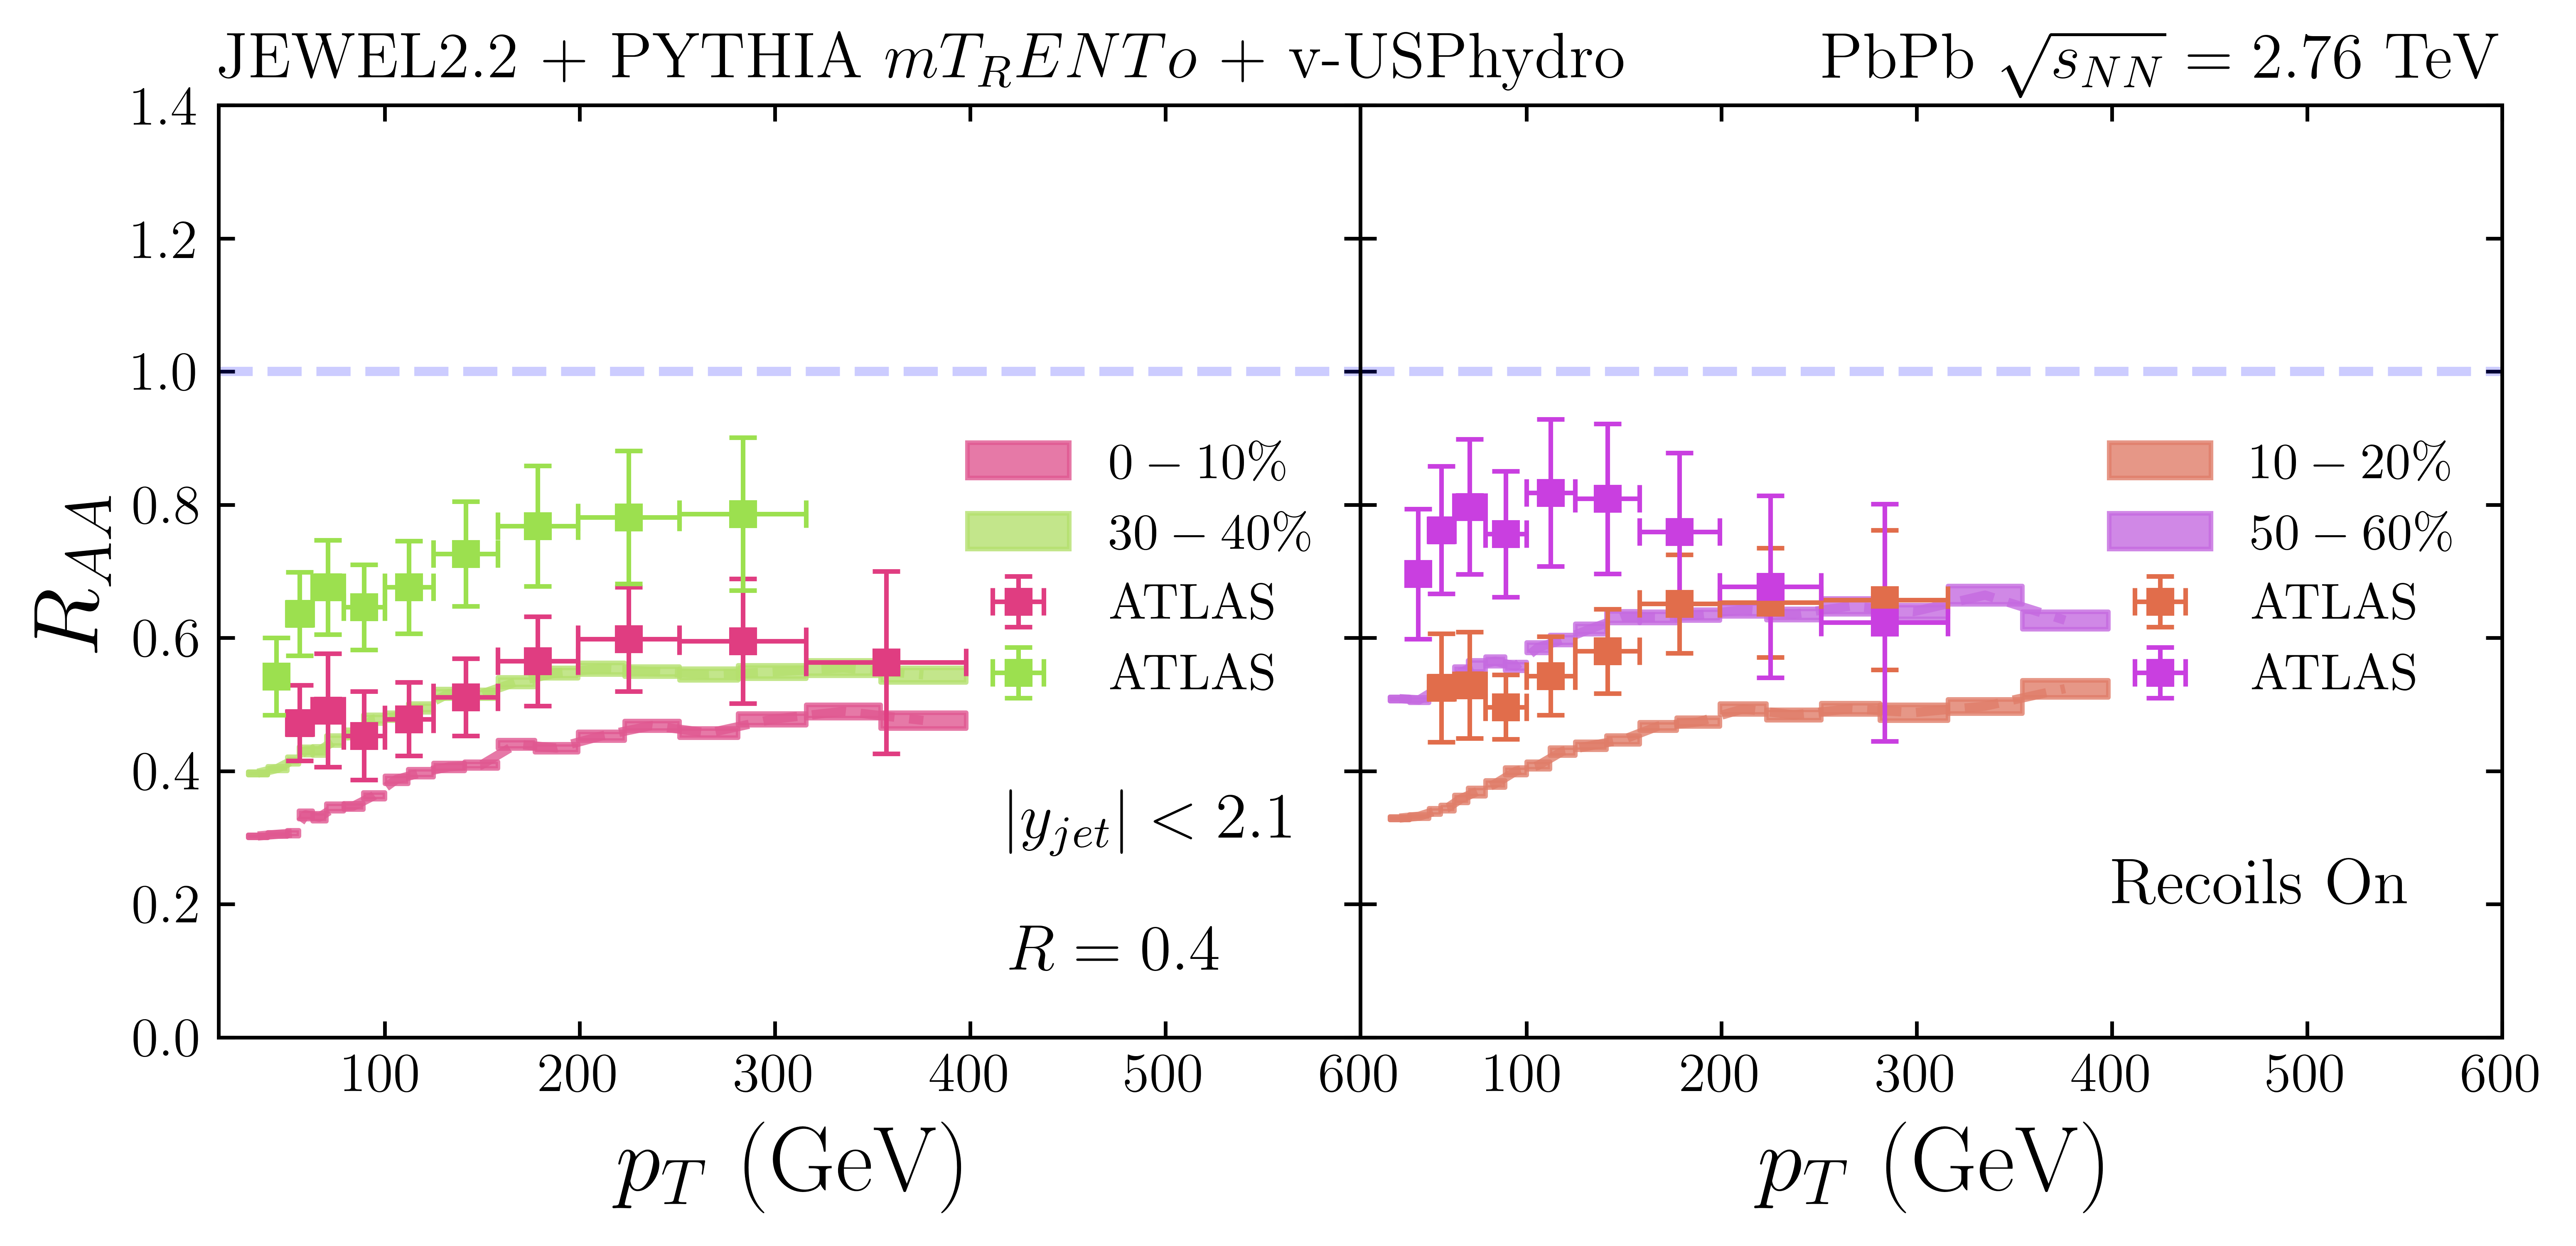

In [31]:
#RAA vUSP FLOW w/ recoil Jewel2.2 2.76TeV

import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,4), dpi = 800)

#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
CENTS = ['0-10','10-20','30-40','50-60']
#CENTS = ['0-10']

for i in range(len(CENTS)):
    #yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vacuum/pp_2305_276_raa_R'+str(R)+'.yoda')
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_2760/pp220-2vT_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-2Twrec/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS_old/JetpT_R'+str(R))
    #obs.append('/RAA_ATLAS_old/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]
    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
          
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0


    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E05891', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E05891')
            
            
        axs1.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#E05891', linestyle='--')
        #axs1.legend(loc=1)
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E07D69', label='$10-20\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E07D69')
            
        axs2.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#E07D69', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#B5E06E', label='$30-40\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#B5E06E')
            
        axs1.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#B5E06E', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#C56AE0', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#C56AE0')
            
        axs2.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#C56AE0', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_27_0-10_276.yoda', '/REF/ATLAS_2014_I1326911/d27-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_28_10-20_276.yoda', '/REF/ATLAS_2014_I1326911/d28-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_30_30-40_276.yoda', '/REF/ATLAS_2014_I1326911/d30-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_32_50-60_276.yoda', '/REF/ATLAS_2014_I1326911/d32-x01-y01')

axs1.errorbar(*ATLAS1, color='#E03D81', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS12, color='#E16D4B', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs1.errorbar(*ATLAS34, color='#9CE04F', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='#C93FE0', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
    
    

# Define plot
axs1.axhline(y=1.0, xmin=0., xmax=600., alpha=0.2, color='b', linestyle='--')
axs2.axhline(y=1.0, xmin=0., xmax=600., alpha=0.2, color='b', linestyle='--')




# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
#plt.xlabel('$p_{T}$ [GeV]')
#plt.ylabel('$R_{AA}$')
#plt.title('Jewel2.4')
#plt.text(50., 0.95, 'Jewel2.4 Default w/ recoils')
#plt.text(50., 0.8, 'R = 0.4')
#plt.text(50., 0.7, '$\sqrt{s_{NN}}=5.02$ TeV')

axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


axs1.legend(loc='center right')
#plt.title('Jewel + PYTHIA $T_R ENTRO$ + vUSPhydro')
axs2.legend(loc='center right')

plt.sca(axs1)
#plt.title('JEWEL + PYTHIA', loc='left', fontsize = 14)
plt.title('JEWEL2.2 + PYTHIA  $\rm T_{R}ENTo$ + v-USPhydro', loc='left', fontsize = 14)
axs2.set_title('PbPb $\sqrt{s_{NN}} = 2.76$ TeV', loc='right', fontsize = 14)
axs1.text(420., 0.3,'$|y_{jet}|<2.1$', fontsize = 14)
axs1.text(420., 0.1,'$R = 0.4$', fontsize = 14)
axs2.text(400., 0.2,'Recoils On', fontsize = 14)
#axs2.text(400., 0.3,'w/ filtering', fontsize = 14)



#plt.legend(loc=1)
axs1.set_xlim(15., 600.)
axs1.set_ylim(0., 1.4)
axs2.set_xlim(15., 600.)
axs2.set_ylim(0., 1.4)


plt.savefig('./Figures/2.76TeV/vTj2-2Twrec_raa_cents_R0.4.pdf')
plt.savefig('./Figures/2.76TeV/vTj2-2Twrec_raa_cents_R0.4.png')

#Mostrar gráfico
plt.show()


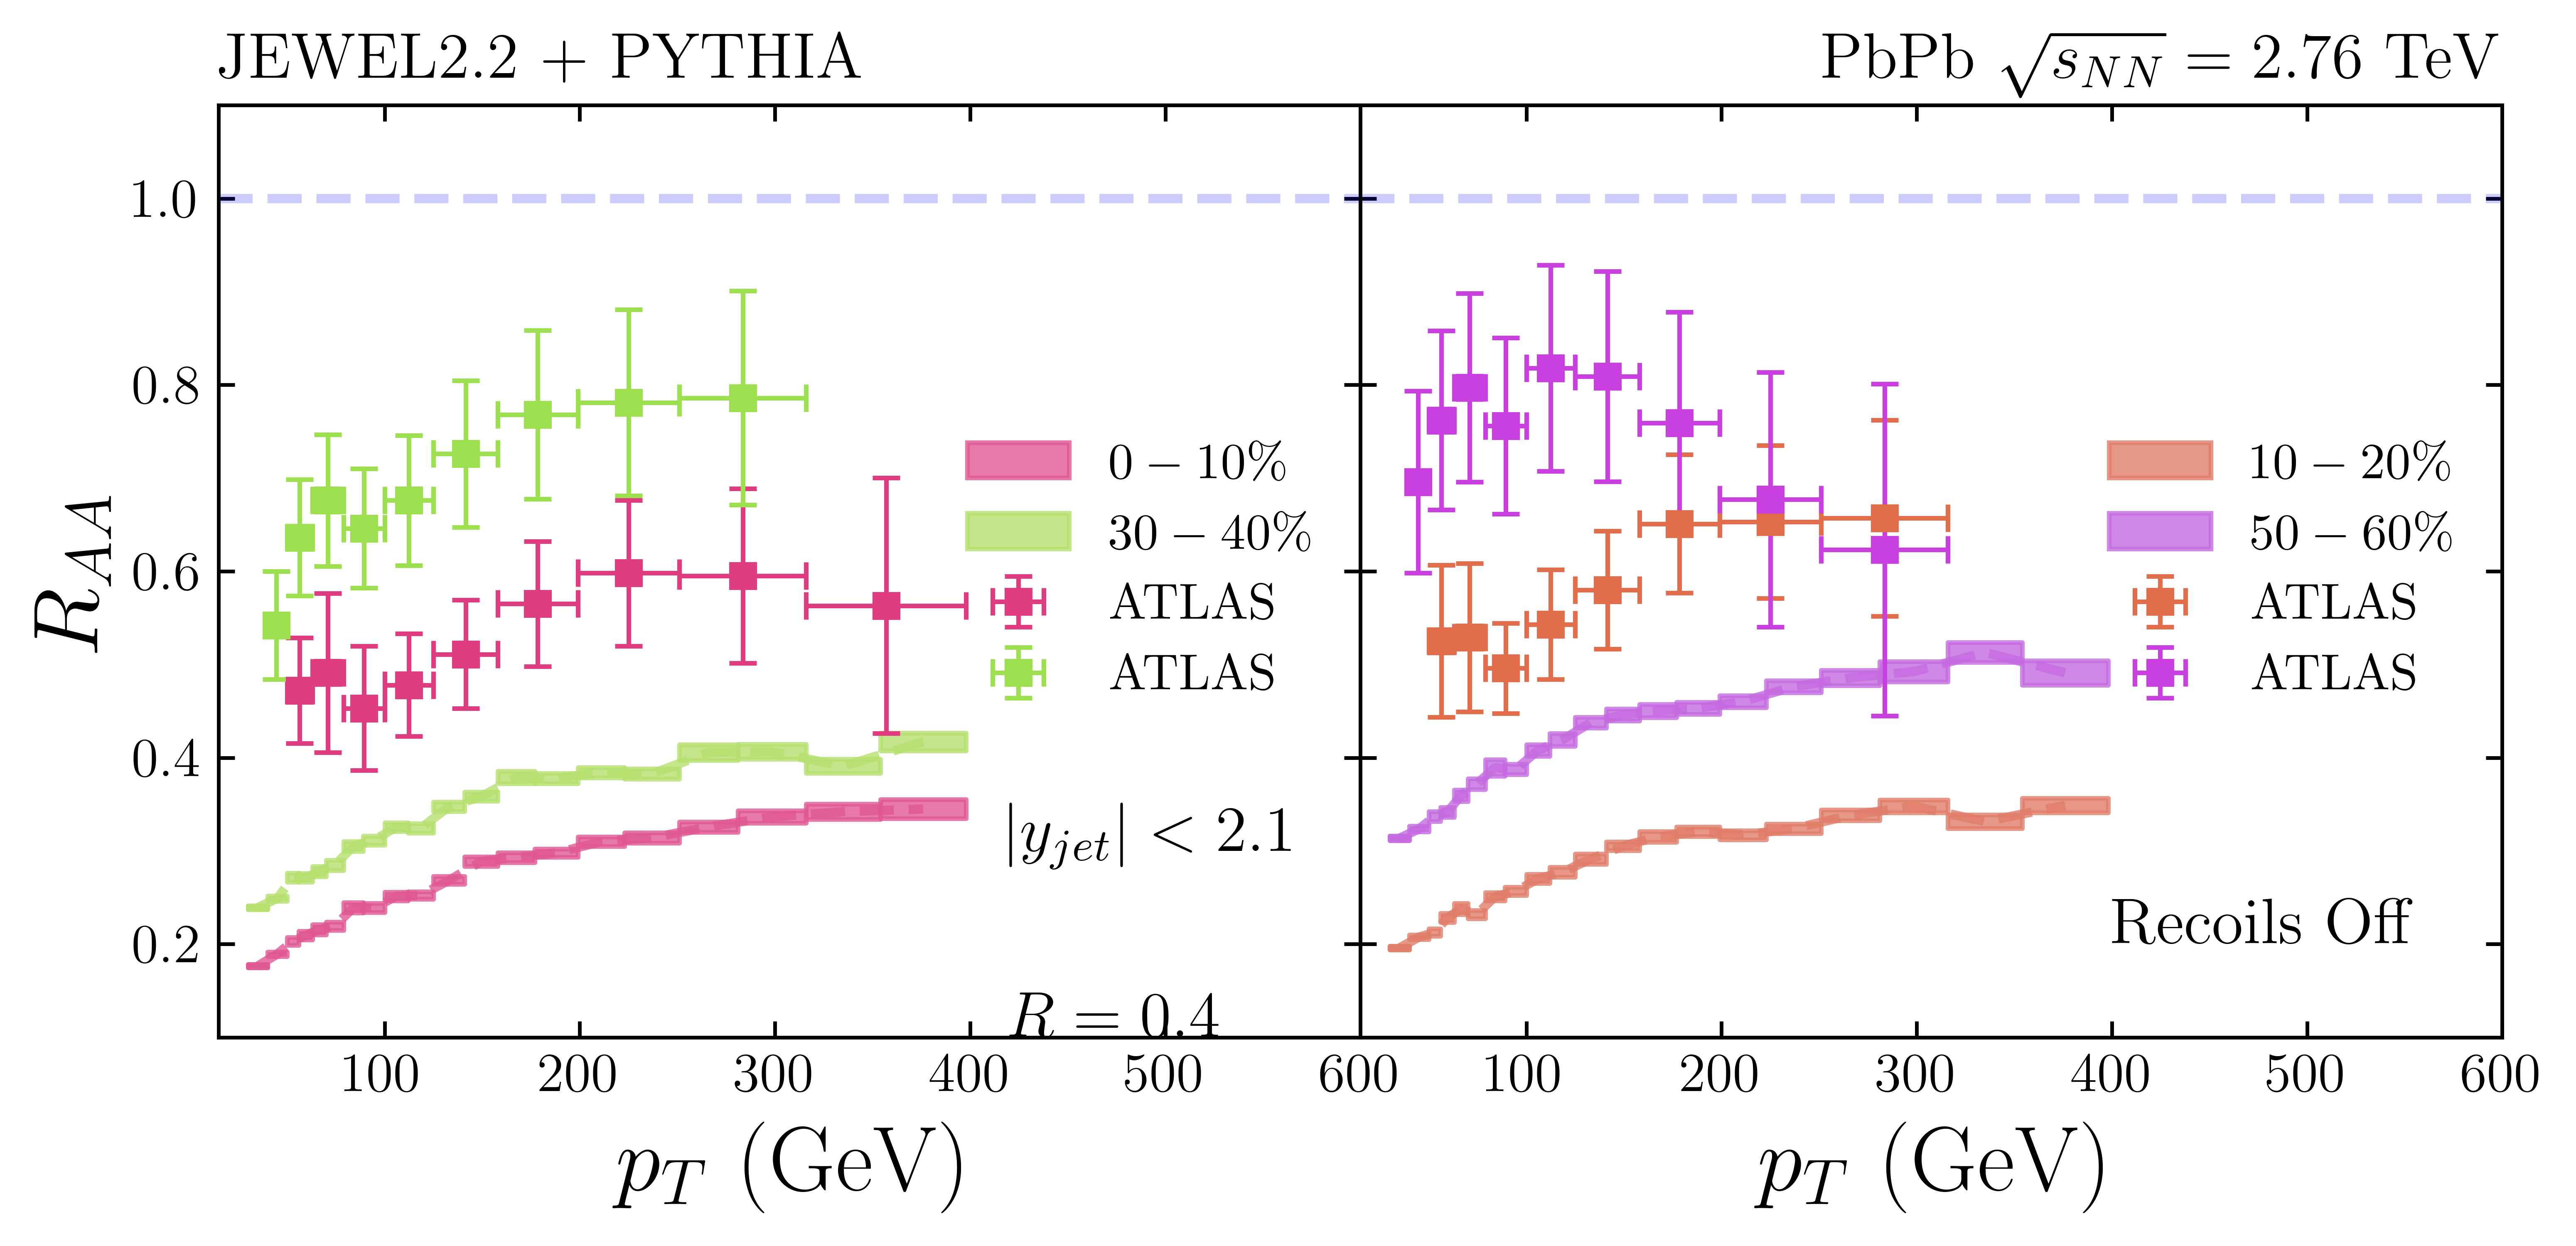

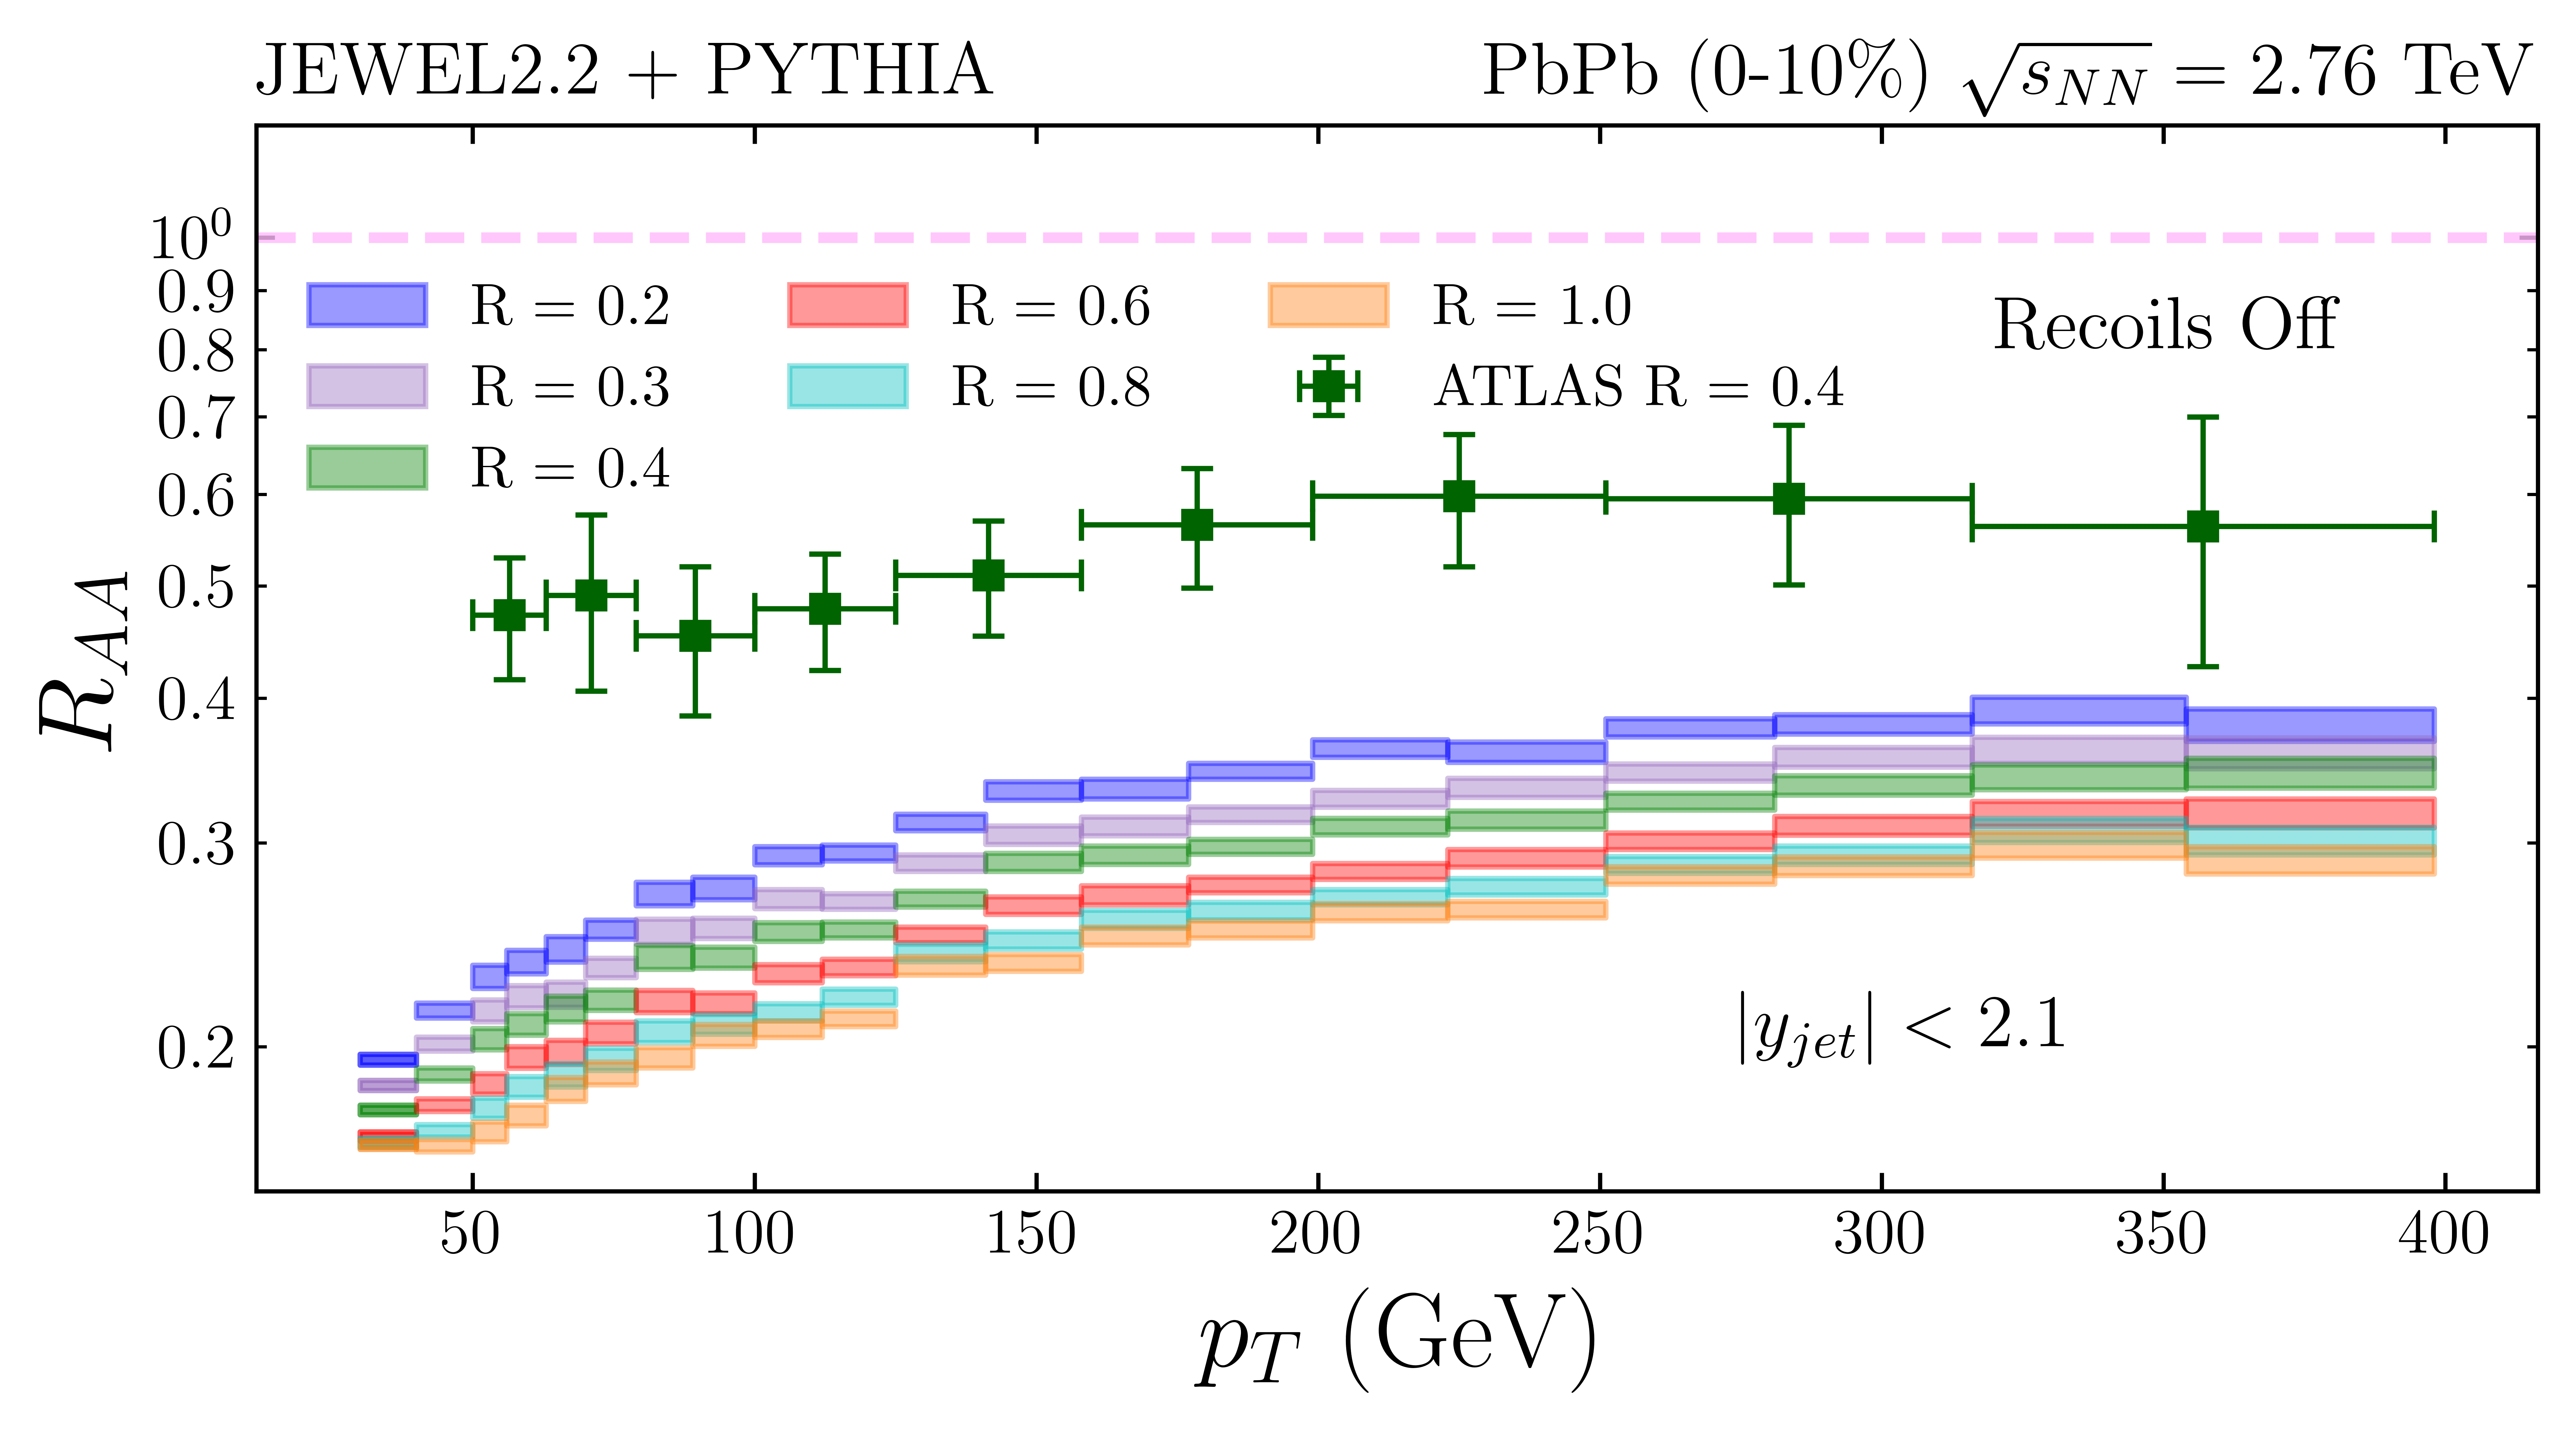

In [107]:
#RAA Default w/o recoil Jewel2.2 2.76TeV

import yoda
#import rivet
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,4), dpi = 800)

#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
CENTS = ['0-10','10-20','30-40','50-60']
#CENTS = ['0-10']

for i in range(len(CENTS)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_2760/pp220-2vT_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/Dj2-2Tworec/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obspp.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obs.append('/RAA_ATLAS_old/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]
    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
          
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0


    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E05891', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E05891')
            
            
        axs1.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#E05891', linestyle='--')
        #axs1.legend(loc=1)
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E07D69', label='$10-20\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E07D69')
            
        axs2.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#E07D69', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#B5E06E', label='$30-40\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#B5E06E')
            
        axs1.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#B5E06E', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#C56AE0', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#C56AE0')
            
        axs2.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#C56AE0', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_27_0-10_276.yoda', '/REF/ATLAS_2014_I1326911/d27-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_28_10-20_276.yoda', '/REF/ATLAS_2014_I1326911/d28-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_30_30-40_276.yoda', '/REF/ATLAS_2014_I1326911/d30-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_32_50-60_276.yoda', '/REF/ATLAS_2014_I1326911/d32-x01-y01')

axs1.errorbar(*ATLAS1, color='#E03D81', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS12, color='#E16D4B', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs1.errorbar(*ATLAS34, color='#9CE04F', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='#C93FE0', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')          
    
    

# Define plot
axs1.axhline(y=1.0, xmin=0., xmax=600., alpha=0.2, color='b', linestyle='--')
axs2.axhline(y=1.0, xmin=0., xmax=600., alpha=0.2, color='b', linestyle='--')




# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
#plt.xlabel('$p_{T}$ [GeV]')
#plt.ylabel('$R_{AA}$')
#plt.title('Jewel2.4')
#plt.text(50., 0.95, 'Jewel2.4 Default w/ recoils')
#plt.text(50., 0.8, 'R = 0.4')
#plt.text(50., 0.7, '$\sqrt{s_{NN}}=5.02$ TeV')

axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


axs1.legend(loc='center right')
#plt.title('Jewel + PYTHIA $T_R ENTRO$ + vUSPhydro')
axs2.legend(loc='center right')

plt.sca(axs1)
#plt.title('JEWEL + PYTHIA', loc='left', fontsize = 14)
plt.title('JEWEL2.2 + PYTHIA', loc='left', fontsize = 14)
axs2.set_title('PbPb $\sqrt{s_{NN}} = 2.76$ TeV', loc='right', fontsize = 14)
axs1.text(420., 0.3,'$|y_{jet}|<2.1$', fontsize = 14)
axs1.text(420., 0.1,'$R = 0.4$', fontsize = 14)
axs2.text(400., 0.2,'Recoils Off', fontsize = 14)
#axs2.text(400., 0.3,'w/ filtering', fontsize = 14)



#plt.legend(loc=1)
axs1.set_xlim(15., 600.)
axs1.set_ylim(0.1, 1.1)
axs2.set_xlim(15., 600.)
axs2.set_ylim(0.1, 1.1)


plt.savefig('./Figures/2.76TeV/Dj2-2Tworec_raa_cents_R0.4.pdf')
plt.savefig('./Figures/2.76TeV/Dj2-2Tworec_raa_cents_R0.4.png')


#Mostrar gráfico
plt.show()

########################################################################################################################################

#R comparation default w/o rec 2.76 TeV

yodapp = [] 
yodaPbPb = []
obs = []



plt.figure(2, figsize=(7,4), dpi = 1200)

            
#Plot dos dados experimentais            
ATLAS = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_27_0-10_276.yoda', '/REF/ATLAS_2014_I1326911/d27-x01-y01')

plt.errorbar(*ATLAS, color='darkgreen', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS R = 0.4')       





R = [0.2,0.3,0.4,0.6,0.8,1.0]

CENTS = '0-10'

for i in range(len(R)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_2760/pp220-2vT_raa_R'+str(R[i])+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/Dj2-2Tworec/'+str(CENTS)+'_raa_R'+str(R[i])+'.yoda')

    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R[i]))
    
    
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]      
                    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)

    #PbPb_jet.rebin(2)
    #pp_jet.rebin(2)
          
    raa = PbPb_jet / pp_jet
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
                    
                

    arr = [x, y, yerr, xerr]

    minpt = 0


    if (R[i] == 0.2):        

        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b', label='R = 0.2')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b')
            
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='b', linestyle='--')
    
    if (R[i] == 0.3):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple', label='R = 0.3')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='tab:purple', linestyle='--')
            
    if (R[i] == 0.4):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g', label='R = 0.4')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='g', linestyle='--')
            
    if (R[i] == 0.6):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r', label='R = 0.6')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='r', linestyle='--')
            
    if (R[i] == 0.8):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c', label='R = 0.8')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='c', linestyle='--')
            
    if (R[i] == 1.0):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange', label='R = 1.0')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.2, color='tab:orange', linestyle='--')

            

     
            

    
    

# Define plot
plt.axhline(y=1.0, xmin=0., xmax=1200., alpha=0.8, color='#ffbafc', linestyle='--')







# plt.errorbar(x, y, yerr, xerr, fmt='o')
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$p_{T}$ (GeV)')
plt.ylabel('$R_{AA}$')
plt.title('JEWEL2.2 + PYTHIA', loc='left', fontsize = 14)
plt.title('PbPb (0-10\%) $\sqrt{s_{NN}} = 2.76$ TeV', loc='right', fontsize = 14)

#plt.text(210., 0.9, 'PbPb (0-10\%) $\sqrt{s_{NN}} = 2.76$ TeV', fontsize = 14)
plt.text(275., 0.2,'$|y_{jet}|<2.1$', fontsize = 14)
plt.text(320., 0.8,'Recoils Off', fontsize = 14)
plt.legend(ncol=3,loc=2,bbox_to_anchor=(0., 0.9))
#plt.xlim(15., 650.)
plt.ylim(0.15, 1.25)
plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter(useOffset=True)) # <---- Added




# Save
#plt.savefig('./imagens/simple_raa_Rs.pdf')
plt.savefig('./Figures/2.76TeV/Dj2-2Tworec_raa_0-10_Rs.pdf')
plt.savefig('./Figures/2.76TeV/Dj2-2Tworec_raa_0-10_Rs.png')


#Mostrar gráfico
plt.show()





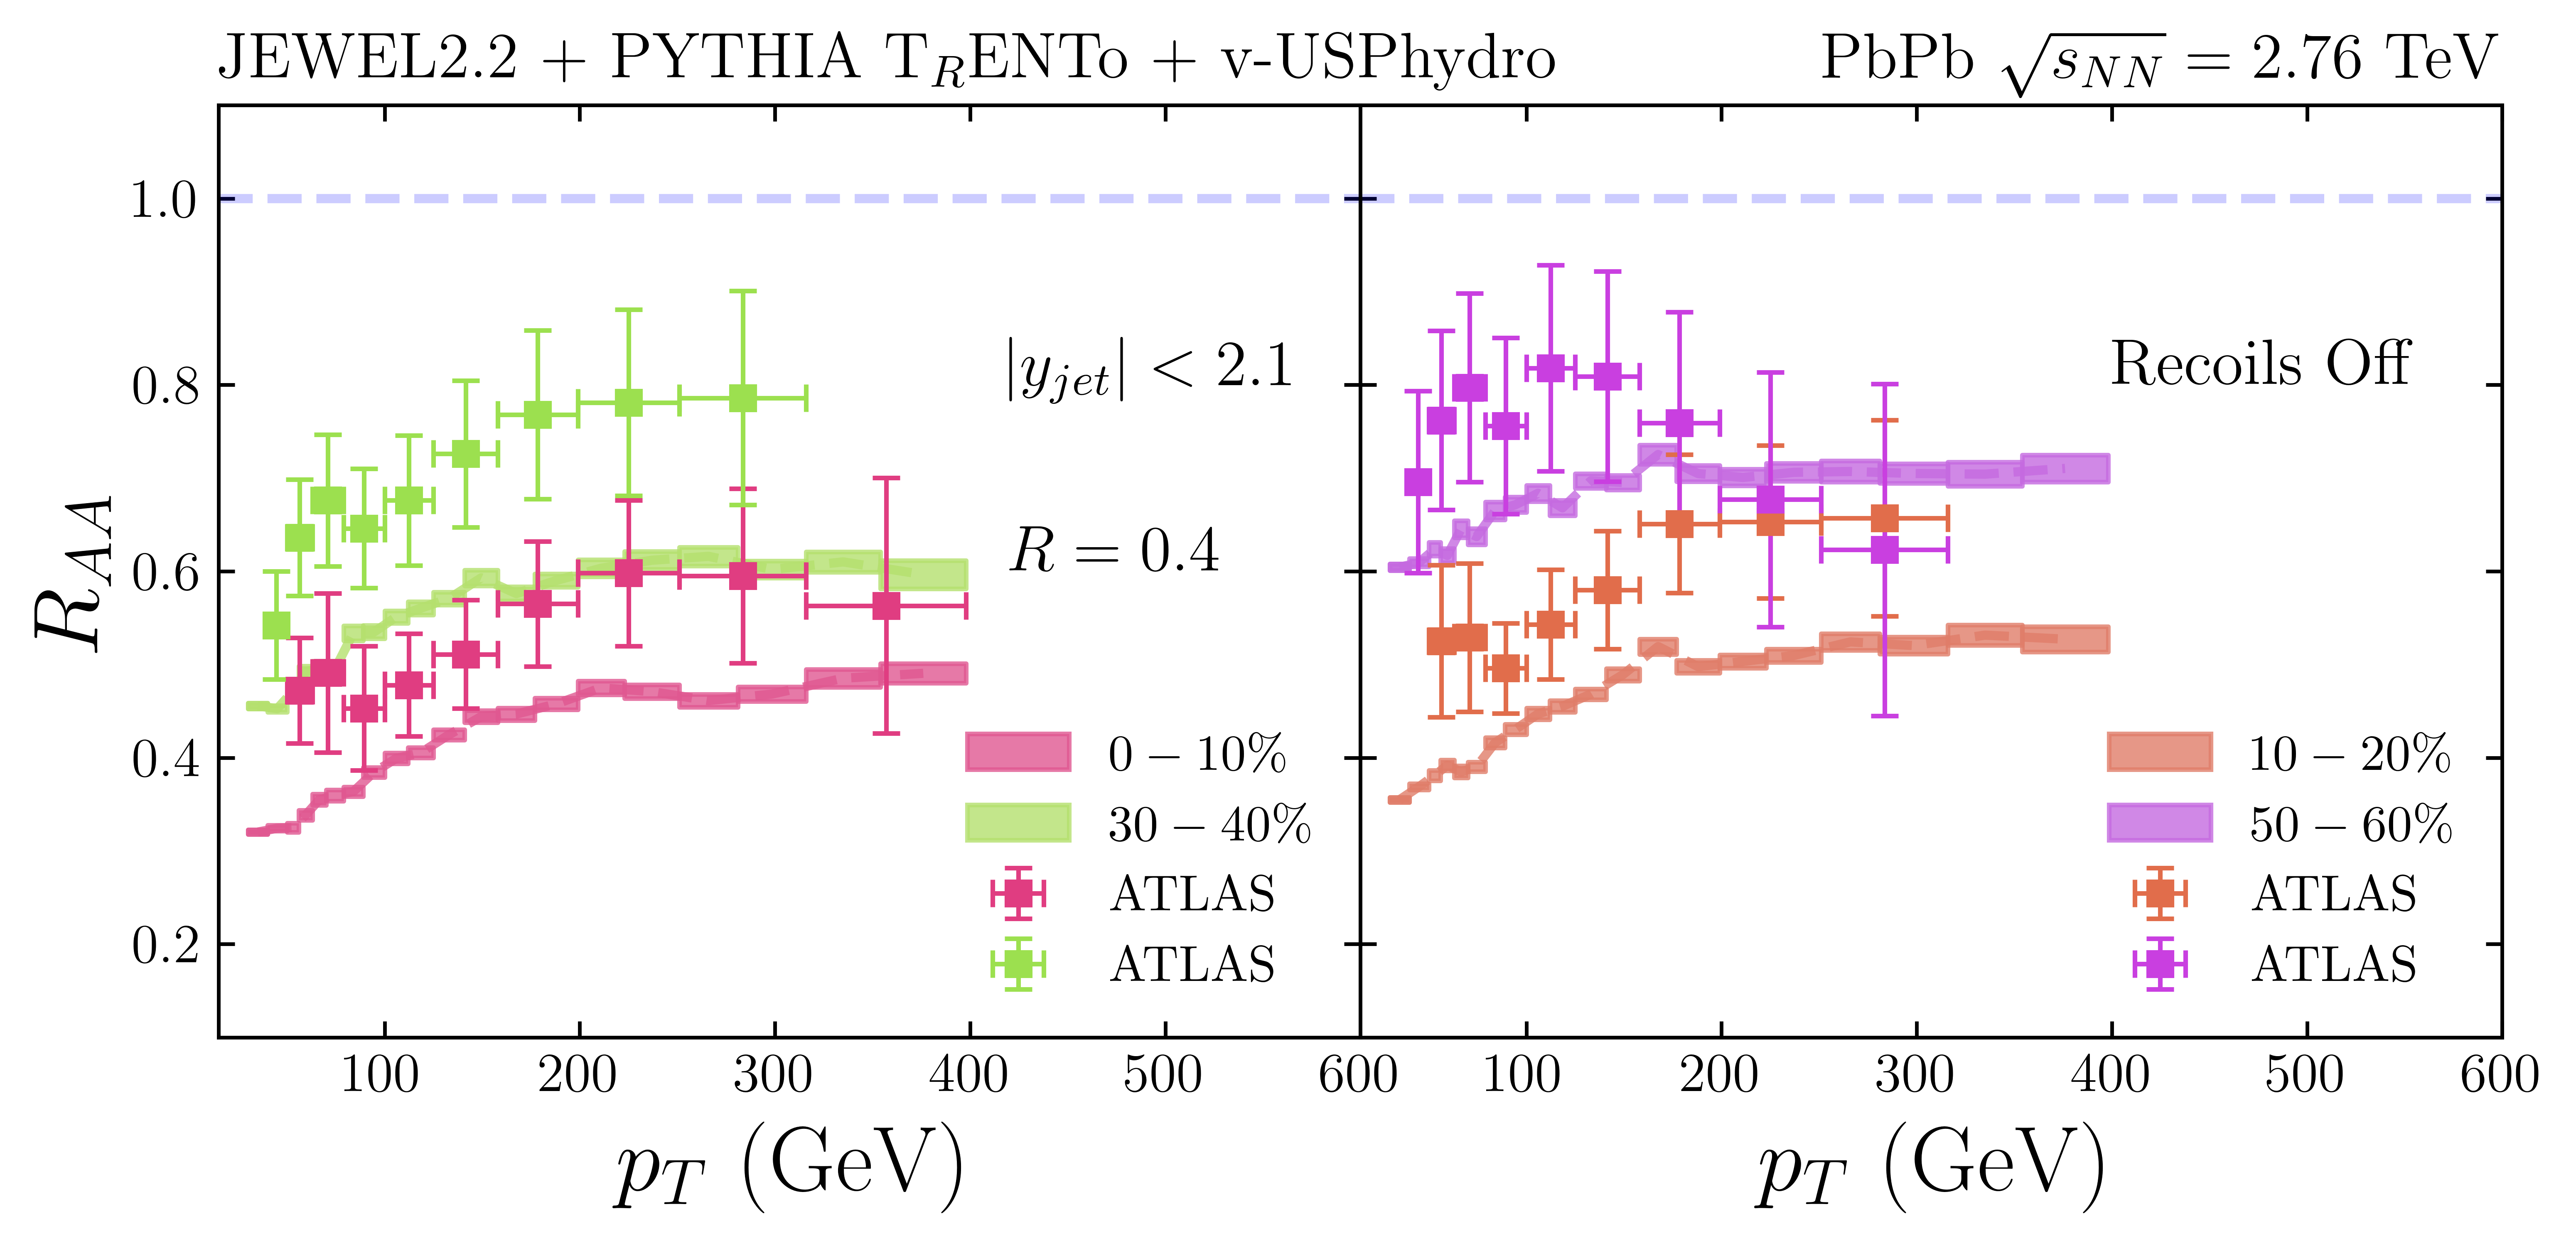

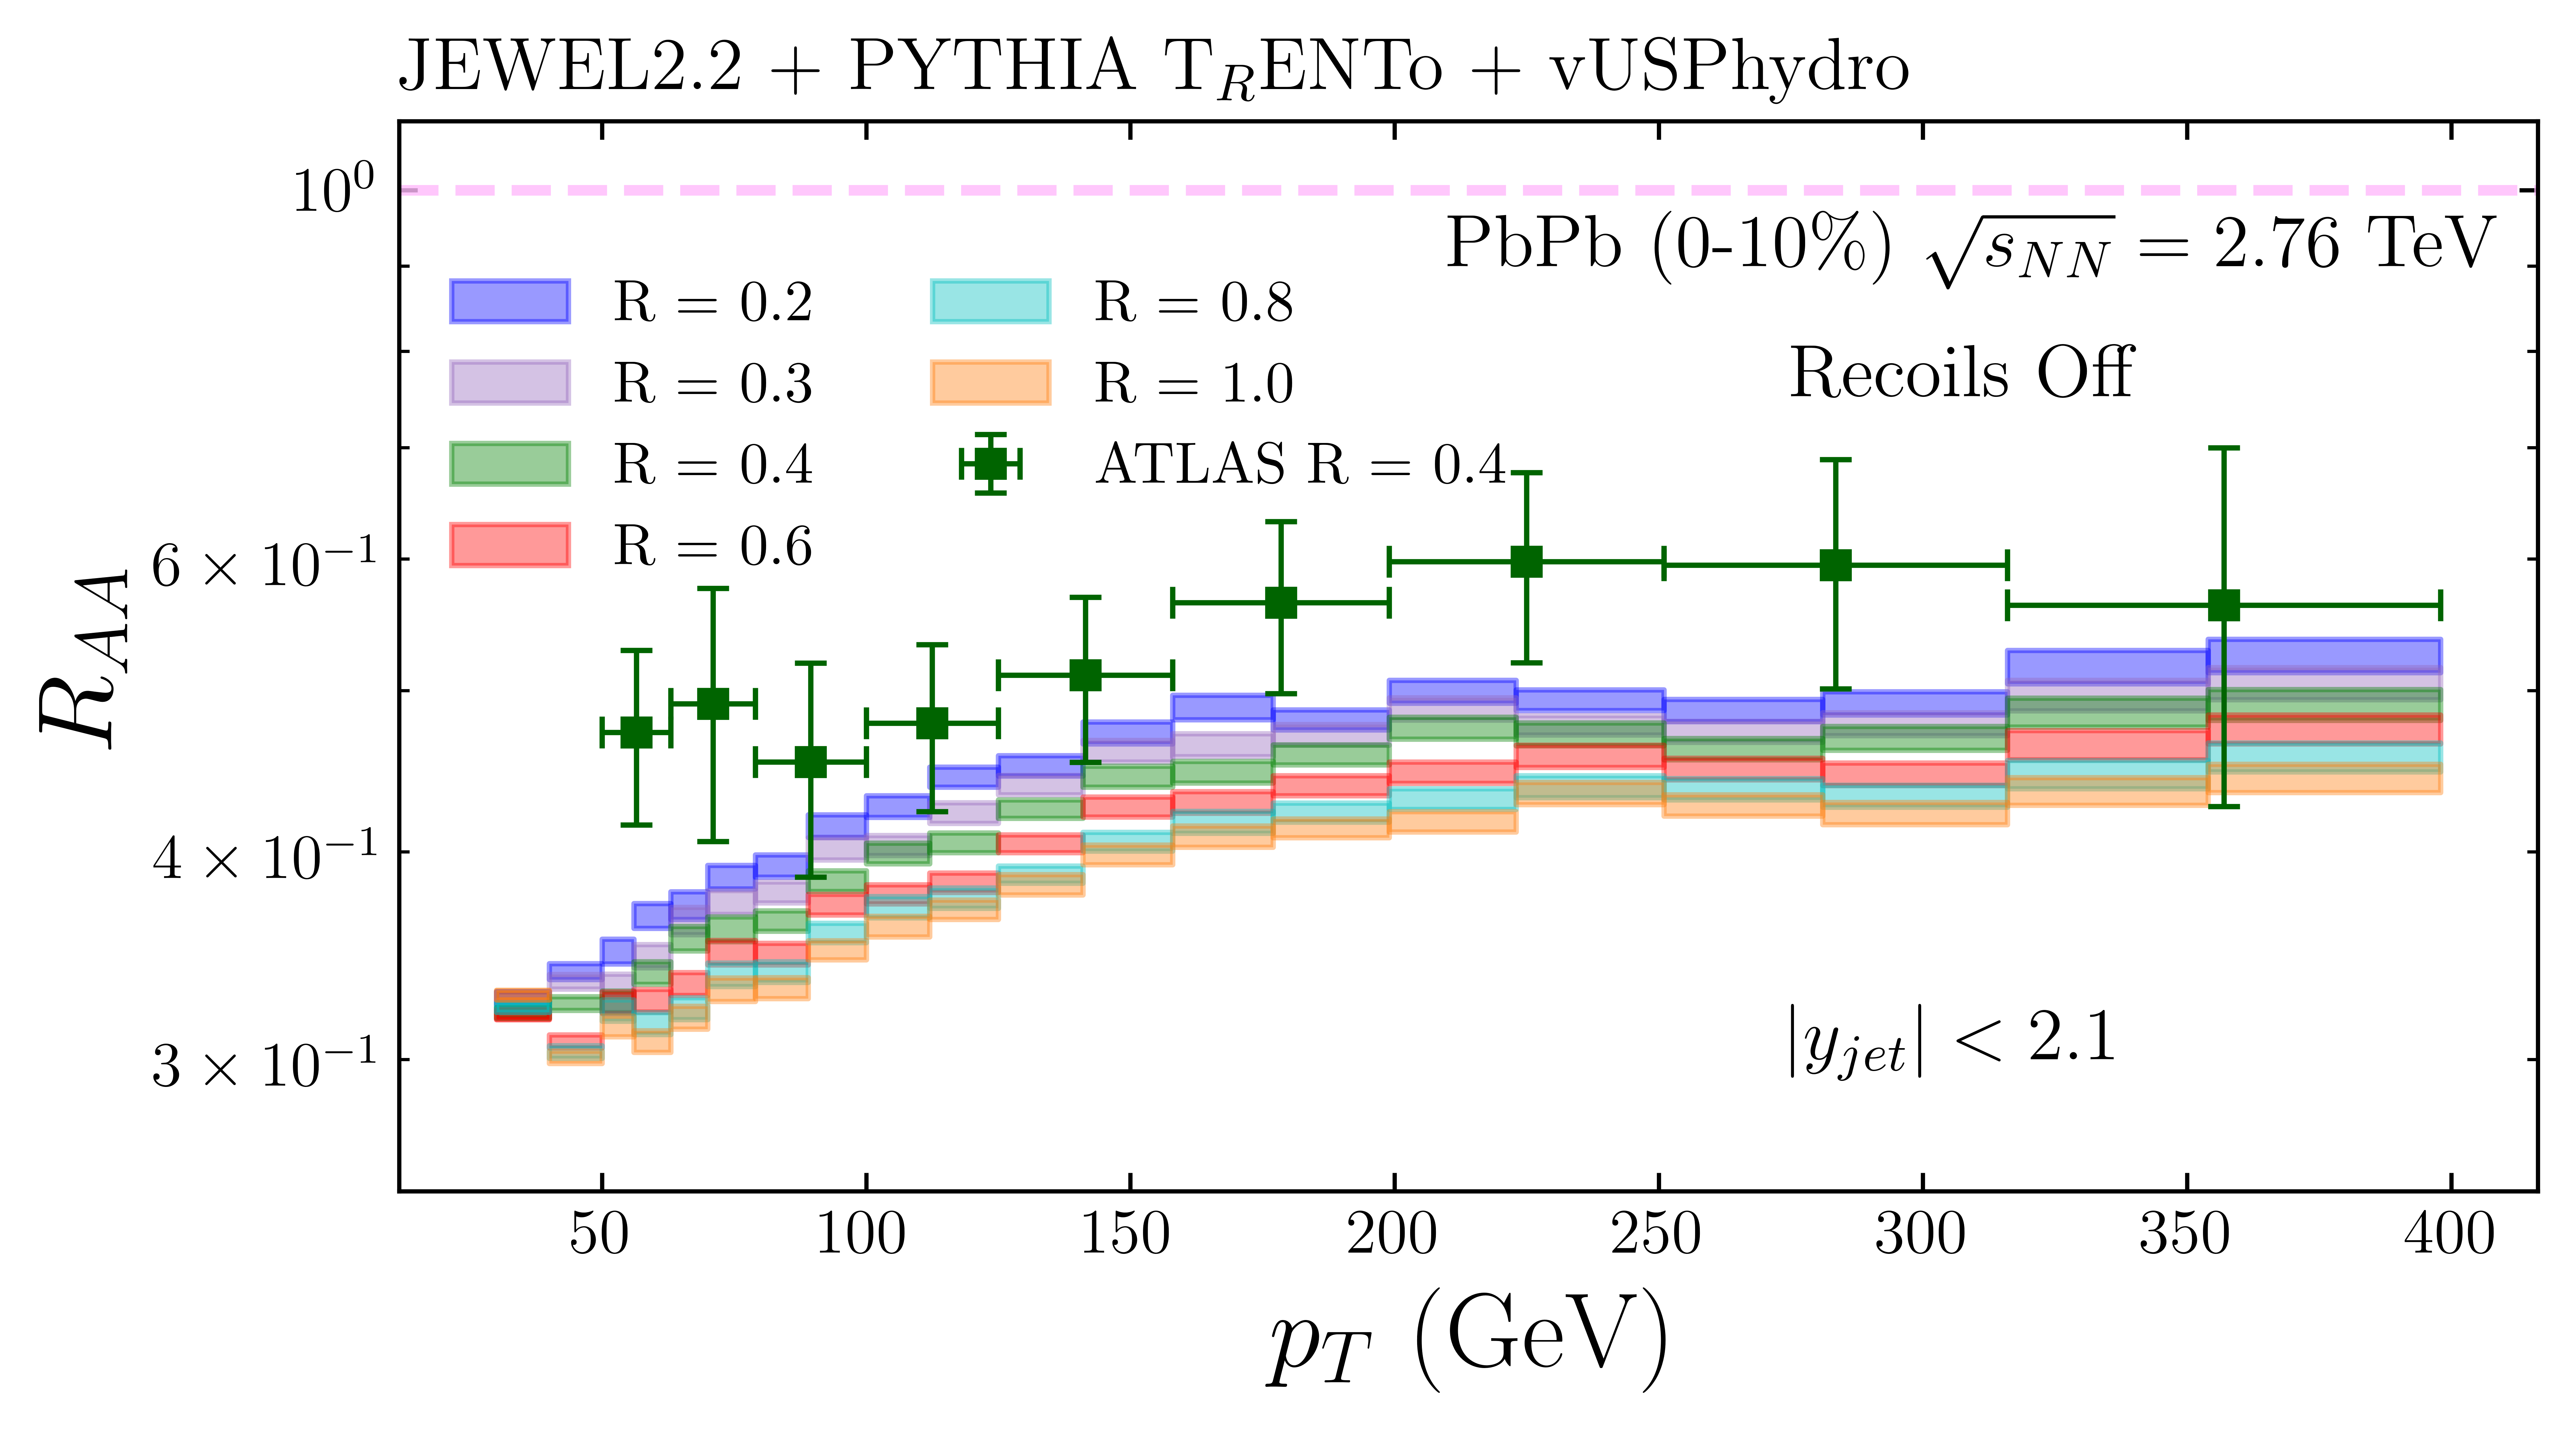

In [66]:
#RAA vUSP FLOW w/o recoil Jewel2.2 2.76TeV

import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,4), dpi = 800)

#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
CENTS = ['0-10','10-20','30-40','50-60']
#CENTS = ['0-10']

for i in range(len(CENTS)):
    #yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vacuum/pp_2305_276_raa_R'+str(R)+'.yoda')
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_2760/pp220-2vT_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-2Tworec/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS_old/JetpT_R'+str(R))
    #obs.append('/RAA_ATLAS_old/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]
    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
          
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0


    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E05891', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E05891')
            
            
        axs1.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#E05891', linestyle='--')
        #axs1.legend(loc=1)
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E07D69', label='$10-20\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#E07D69')
            
        axs2.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#E07D69', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#B5E06E', label='$30-40\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#B5E06E')
            
        axs1.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#B5E06E', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#C56AE0', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='#C56AE0')
            
        axs2.plot(arr[0][:-3], arr[1][:-3], alpha=0.8, color='#C56AE0', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_27_0-10_276.yoda', '/REF/ATLAS_2014_I1326911/d27-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_28_10-20_276.yoda', '/REF/ATLAS_2014_I1326911/d28-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_30_30-40_276.yoda', '/REF/ATLAS_2014_I1326911/d30-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_32_50-60_276.yoda', '/REF/ATLAS_2014_I1326911/d32-x01-y01')

axs1.errorbar(*ATLAS1, color='#E03D81', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS12, color='#E16D4B', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs1.errorbar(*ATLAS34, color='#9CE04F', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='#C93FE0', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
    
    

# Define plot
axs1.axhline(y=1.0, xmin=0., xmax=600., alpha=0.2, color='b', linestyle='--')
axs2.axhline(y=1.0, xmin=0., xmax=600., alpha=0.2, color='b', linestyle='--')




# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
#plt.xlabel('$p_{T}$ [GeV]')
#plt.ylabel('$R_{AA}$')
#plt.title('Jewel2.4')
#plt.text(50., 0.95, 'Jewel2.4 Default w/ recoils')
#plt.text(50., 0.8, 'R = 0.4')
#plt.text(50., 0.7, '$\sqrt{s_{NN}}=5.02$ TeV')

axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


axs1.legend(loc='lower right')
#plt.title('Jewel + PYTHIA $T_R ENTRO$ + vUSPhydro')
axs2.legend(loc='lower right')

plt.sca(axs1)
#plt.title('JEWEL + PYTHIA', loc='left', fontsize = 14)
plt.title('JEWEL2.2 + PYTHIA  T$_{R}$ENTo + v-USPhydro', loc='left', fontsize = 14)
axs2.set_title('PbPb $\sqrt{s_{NN}} = 2.76$ TeV', loc='right', fontsize = 14)
axs1.text(420., 0.8,'$|y_{jet}|<2.1$', fontsize = 14)
axs1.text(420., 0.6,'$R = 0.4$', fontsize = 14)
axs2.text(400., 0.8,'Recoils Off', fontsize = 14)
#axs2.text(400., 0.3,'w/ filtering', fontsize = 14)



#plt.legend(loc=1)
axs1.set_xlim(15., 600.)
axs1.set_ylim(0.1, 1.1)
axs2.set_xlim(15., 600.)
axs2.set_ylim(0.1, 1.1)


plt.savefig('./Figures/2.76TeV/vTj2-2Tworec_raa_cents_R0.4.pdf')
plt.savefig('./Figures/2.76TeV/vTj2-2Tworec_raa_cents_R0.4.png')

#Mostrar gráfico
plt.show()


########################################################################################################################################

#R comparation vUSPhydro w/o rec 2.76 TeV

yodapp = [] 
yodaPbPb = []
obs = []



plt.figure(2, figsize=(7,4), dpi = 1200)

            
#Plot dos dados experimentais            
ATLAS = DataFromExperiment('Data/ATLAS/HEPData-ins1326911-v1-Table_27_0-10_276.yoda', '/REF/ATLAS_2014_I1326911/d27-x01-y01')

plt.errorbar(*ATLAS, color='darkgreen', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS R = 0.4')       





R = [0.2,0.3,0.4,0.6,0.8,1.0]

CENTS = '0-10'

for i in range(len(R)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_2760/pp220-2vT_raa_R'+str(R[i])+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-2Tworec/'+str(CENTS)+'_raa_R'+str(R[i])+'.yoda')

    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R[i]))
    
    
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]      
                    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)

    #PbPb_jet.rebin(2)
    #pp_jet.rebin(2)
          
    raa = PbPb_jet / pp_jet
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
                    
                

    arr = [x, y, yerr, xerr]

    minpt = 0


    if (R[i] == 0.2):        

        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b', label='R = 0.2')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b')
            
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='b', linestyle='--')
    
    if (R[i] == 0.3):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple', label='R = 0.3')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='tab:purple', linestyle='--')
            
    if (R[i] == 0.4):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g', label='R = 0.4')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='g', linestyle='--')
            
    if (R[i] == 0.6):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r', label='R = 0.6')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='r', linestyle='--')
            
    if (R[i] == 0.8):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c', label='R = 0.8')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='c', linestyle='--')
            
    if (R[i] == 1.0):
        for k in range(minpt, arr[0].size-3):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange', label='R = 1.0')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.2, color='tab:orange', linestyle='--')

            

     
            

    
    

# Define plot
plt.axhline(y=1.0, xmin=0., xmax=1200., alpha=0.8, color='#ffbafc', linestyle='--')







# plt.errorbar(x, y, yerr, xerr, fmt='o')
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$p_{T}$ (GeV)')
plt.ylabel('$R_{AA}$')
plt.title('JEWEL2.2 + PYTHIA   T$_{R}$ENTo + vUSPhydro', loc='left', fontsize = 14)

plt.text(210., 0.9, 'PbPb (0-10\%) $\sqrt{s_{NN}} = 2.76$ TeV', fontsize = 14)
plt.text(275., 0.3,'$|y_{jet}|<2.1$', fontsize = 14)
plt.text(275., 0.75,'Recoils Off', fontsize = 14)
plt.legend(ncol=2,loc=2,bbox_to_anchor=(0., 0.9))
#plt.xlim(15., 650.)
plt.ylim(0.25, 1.1)



# Save
#plt.savefig('./imagens/simple_raa_Rs.pdf')
plt.savefig('./Figures/2.76TeV/vTj2-2Tworec_raa_0-10_Rs.pdf')
plt.savefig('./Figures/2.76TeV/vTj2-2Tworec_raa_0-10_Rs.png')


#Mostrar gráfico
plt.show()





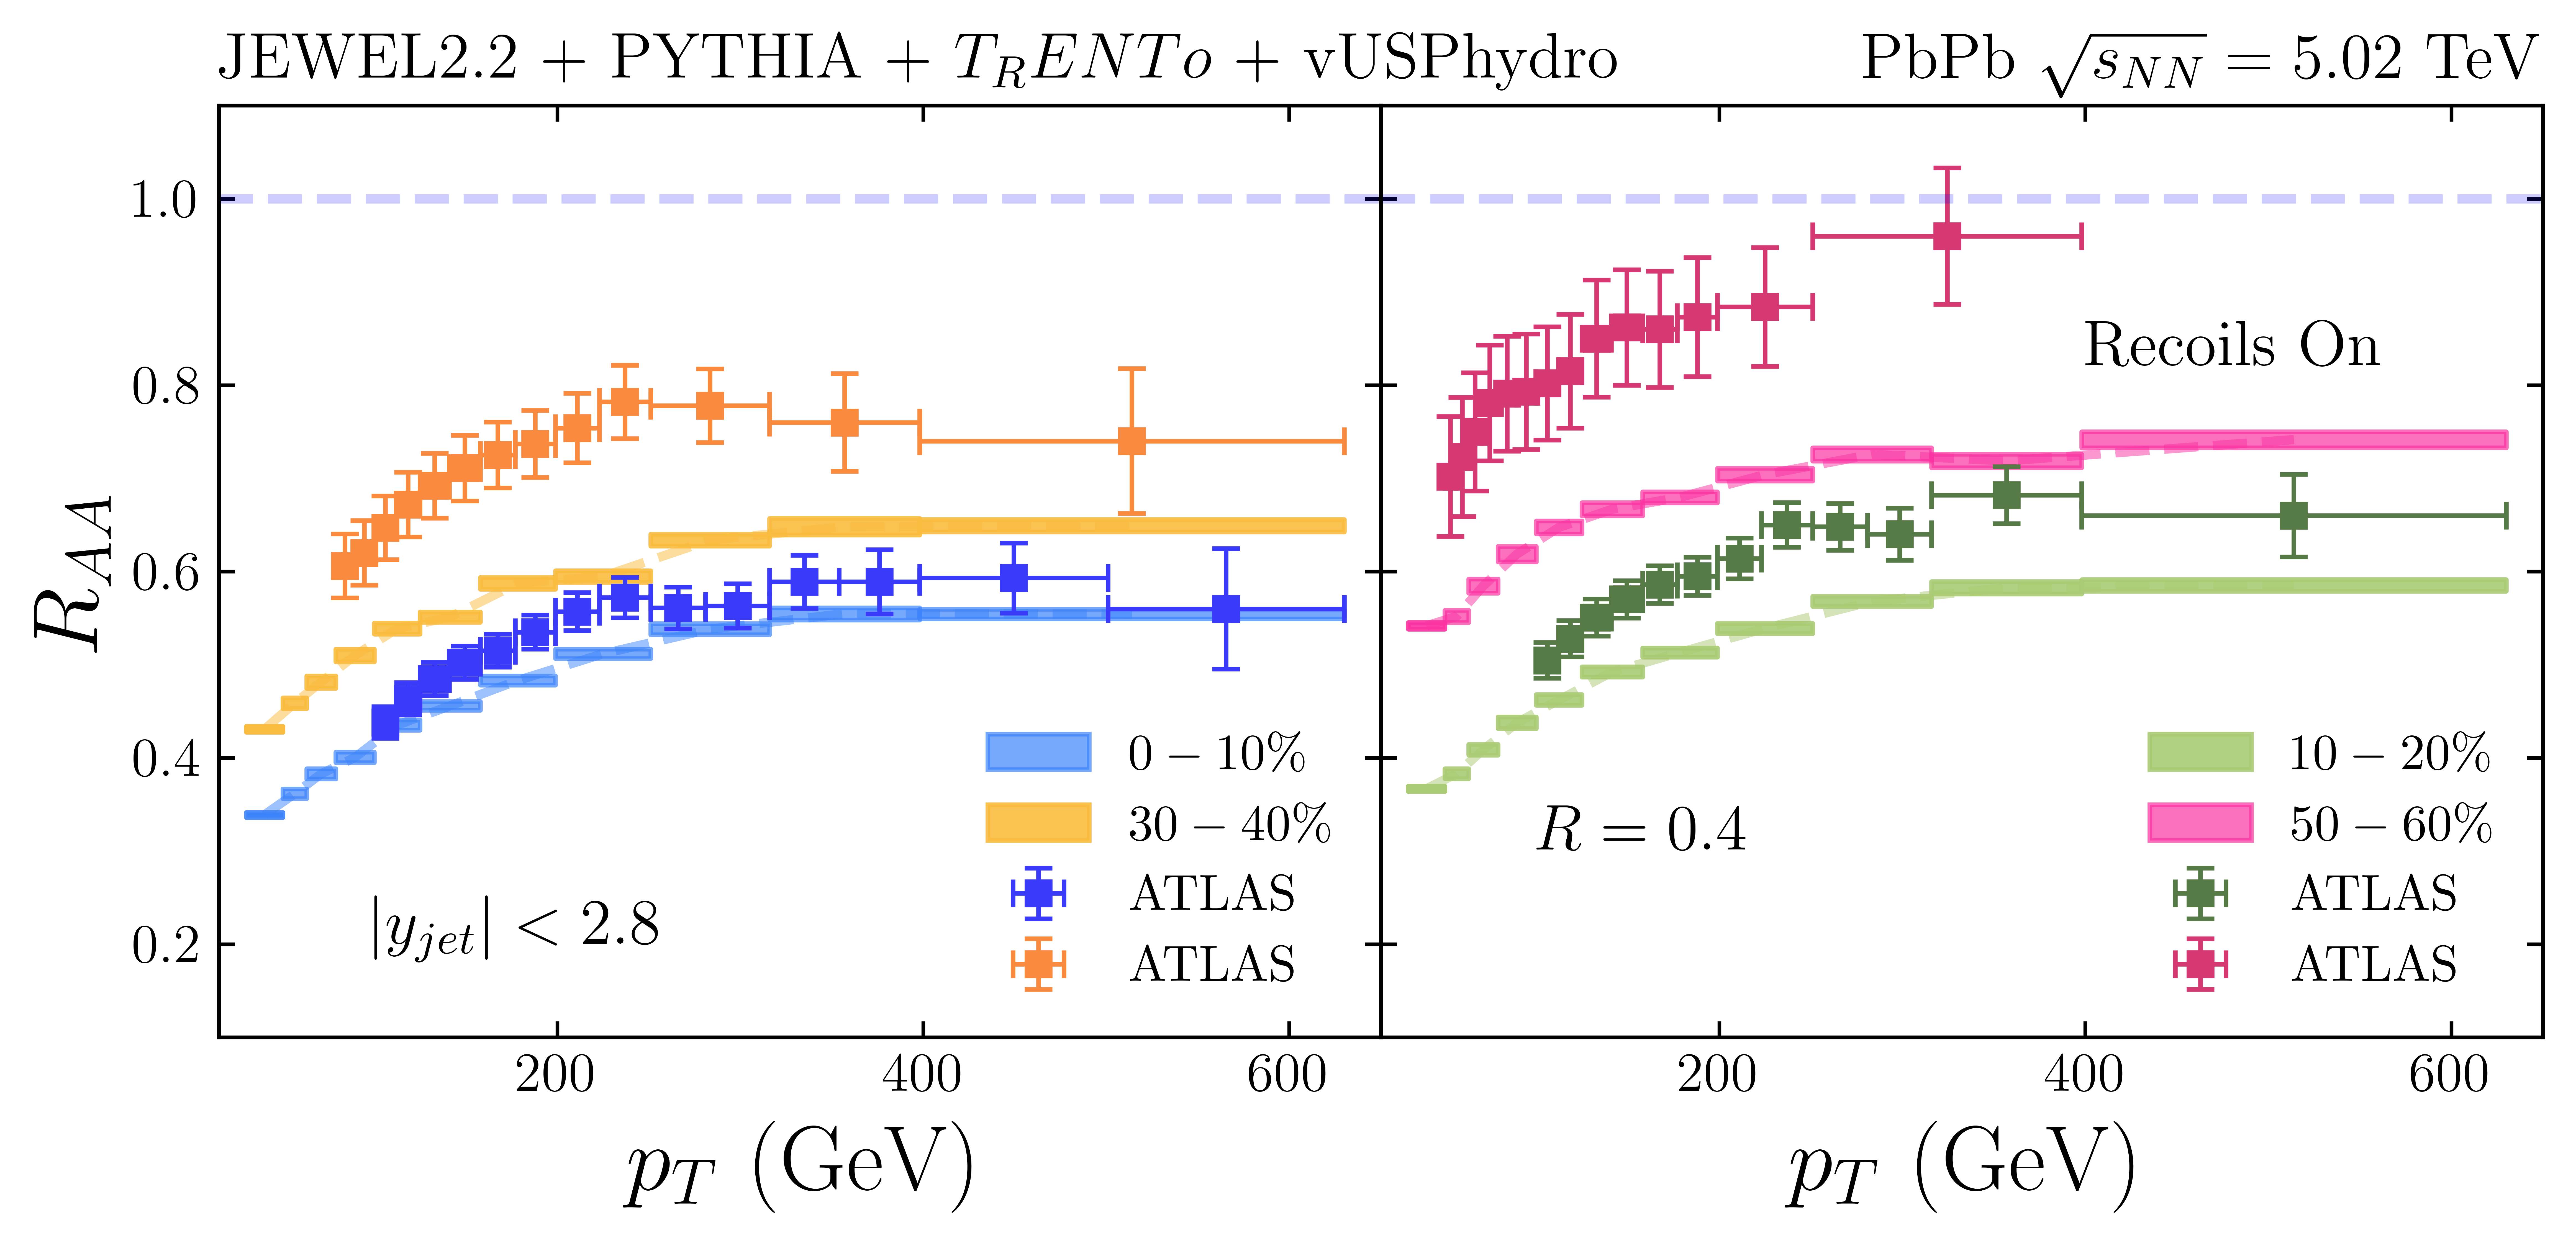

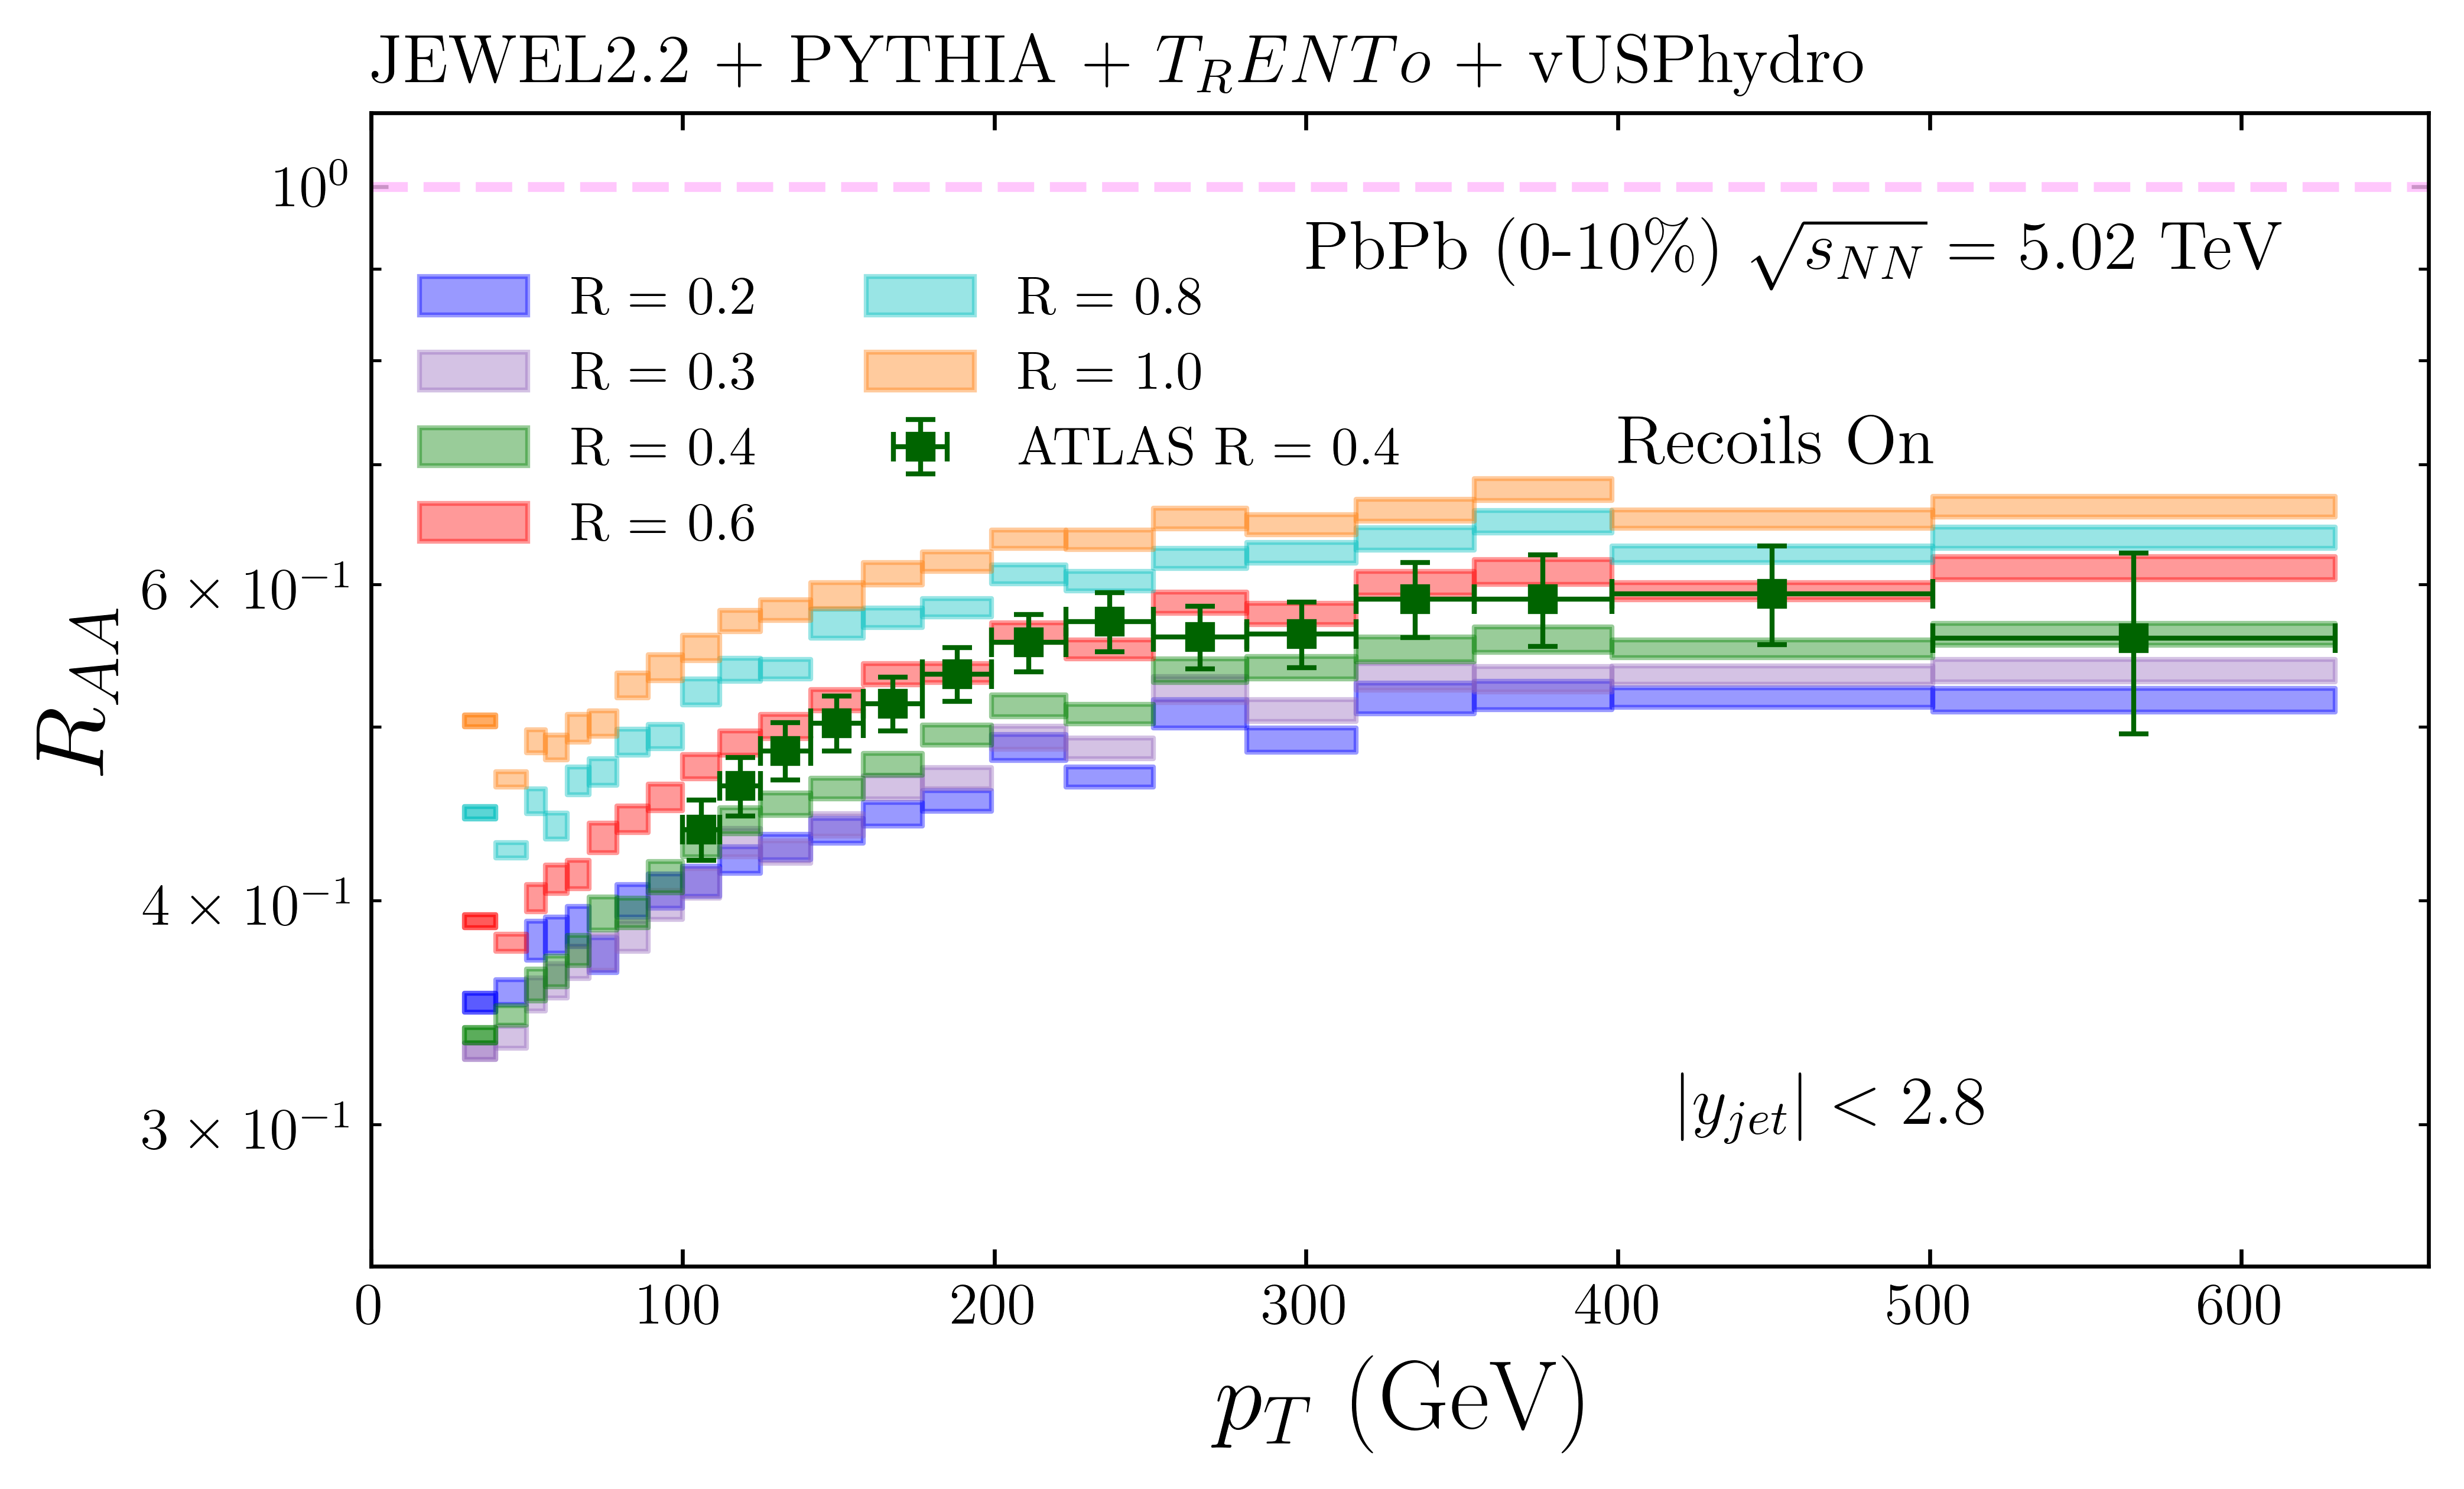

In [27]:
#RAA vUSP FLOW w/ recoil Jewel2.2 5.02 TEV

import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        #max = len(data.xVals()) + 1
        if scatter == '/REF/ATLAS_2018_I1673184/d19-x01-y01':
            max = len(data.xVals()) - 1
        else:
            max = len(data.xVals())

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,4), dpi = 1200)

#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
CENTS = ['0-10','10-20','30-40','50-60']
#CENTS = ['0-10']

for i in range(len(CENTS)):
    #yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vacuum/pp_502_1506_raa_R'+str(R)+'.yoda')
    #yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/jewel2.2/flow_502_2006_reon/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-5Twrec/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    
    
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obs.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]

   
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
    PbPb_jet.rebin(2)
    pp_jet.rebin(2)
    
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0


    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#3C84FA', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#3C84FA')
            
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#3C84FA', linestyle='--')
        #axs1.legend(loc=1)
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#AACB73', label='$10-20\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#AACB73')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#AACB73', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#FABC3E', label='$30-40\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#FABC3E')
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#FABC3E', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#FA32A2', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#FA32A2')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#FA32A2', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS/ATLAS_10-20_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d20-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS/ATLAS_30-40_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d22-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS/ATLAS_50-60_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d24-x01-y01')

axs1.errorbar(*ATLAS1, color='#393AFA', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS12, color='#557A46', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs1.errorbar(*ATLAS34, color='#FA8B3E', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='#D63872', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')      
    
    

# Define plot
axs1.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')
axs2.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')




# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
#plt.xlabel('$p_{T}$ [GeV]')
#plt.ylabel('$R_{AA}$')
#plt.title('Jewel2.4')
#plt.text(50., 0.95, 'Jewel2.4 Default w/ recoils')
#plt.text(50., 0.8, 'R = 0.4')
#plt.text(50., 0.7, '$\sqrt{s_{NN}}=5.02$ TeV')

axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


axs1.legend(loc='lower right')
#axs1.legend(loc=2, bbox_to_anchor=(0., 0.95), ncols = 2)
#plt.title('Jewel + PYTHIA $T_R ENTRO$ + vUSPhydro')
axs2.legend(loc='lower right')

plt.sca(axs1)
#plt.title('JEWEL + PYTHIA', loc='left', fontsize = 14)
plt.title('JEWEL2.2 + PYTHIA + $T_{R}ENTo$ + vUSPhydro', loc='left', fontsize = 14)
axs2.set_title('PbPb $\sqrt{s_{NN}} = 5.02$ TeV', loc='right', fontsize = 14)
axs1.text(100., 0.2,'$|y_{jet}|<2.8$', fontsize = 14)
axs2.text(100., 0.3,'$R = 0.4$', fontsize = 14)
axs2.text(400., 0.82,'Recoils On', fontsize = 14)
#axs2.text(400., 0.3,'w/ filtering', fontsize = 14)



#plt.legend(loc=1)
axs1.set_xlim(15., 650.)
axs1.set_ylim(0.1, 1.1)
axs2.set_xlim(15., 650.)
axs2.set_ylim(0.1, 1.1)


plt.savefig('./Figures/5.02TeV/vTj2-5Twrec_raa_cents_R0.4.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Twrec_raa_cents_R0.4.png')

#Mostrar gráfico
plt.show()


########################################################################################################################################

#R comparation vUSPhydro w/ rec 5.02 TeV

yodapp = [] 
yodaPbPb = []
obs = []



plt.figure(2)
            
#Plot dos dados experimentais            
ATLAS = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')

plt.errorbar(*ATLAS, color='darkgreen', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS R = 0.4')       





R = [0.2,0.3,0.4,0.6,0.8,1.0]

CENTS = '0-10'

for i in range(len(R)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R[i])+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-5Twrec/'+str(CENTS)+'_raa_R'+str(R[i])+'.yoda')

    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R[i]))
    
    
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]      
                    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)

    #PbPb_jet.rebin(2)
    #pp_jet.rebin(2)
          
    raa = PbPb_jet / pp_jet
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
                    
                

    arr = [x, y, yerr, xerr]

    minpt = 0


    if (R[i] == 0.2):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b', label='R = 0.2')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b')
            
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='b', linestyle='--')
    
    if (R[i] == 0.3):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple', label='R = 0.3')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='tab:purple', linestyle='--')
            
    if (R[i] == 0.4):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g', label='R = 0.4')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='g', linestyle='--')
            
    if (R[i] == 0.6):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r', label='R = 0.6')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='r', linestyle='--')
            
    if (R[i] == 0.8):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c', label='R = 0.8')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='c', linestyle='--')
            
    if (R[i] == 1.0):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange', label='R = 1.0')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.2, color='tab:orange', linestyle='--')

            

     
            

    
    

# Define plot
plt.axhline(y=1.0, xmin=0., xmax=1200., alpha=0.8, color='#ffbafc', linestyle='--')

plt.figure(2, dpi = 1200)





# plt.errorbar(x, y, yerr, xerr, fmt='o')
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$p_{T}$ (GeV)')
plt.ylabel('$R_{AA}$')
plt.title('JEWEL2.2 + PYTHIA + $T_{R}ENTo$ + vUSPhydro', loc='left', fontsize = 14)

plt.text(300., 0.9, 'PbPb (0-10\%) $\sqrt{s_{NN}} = 5.02$ TeV', fontsize = 14)
plt.text(420., 0.3,'$|y_{jet}|<2.8$', fontsize = 14)
plt.text(400., 0.7,'Recoils On', fontsize = 14)
plt.legend(ncol=2,loc=2,bbox_to_anchor=(0., 0.9))
#plt.xlim(15., 650.)
plt.ylim(0.25, 1.1)



# Save
#plt.savefig('./imagens/simple_raa_Rs.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Twrec_raa_0-10_Rs.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Twrec_raa_0-10_Rs.png')


#Mostrar gráfico
plt.show()







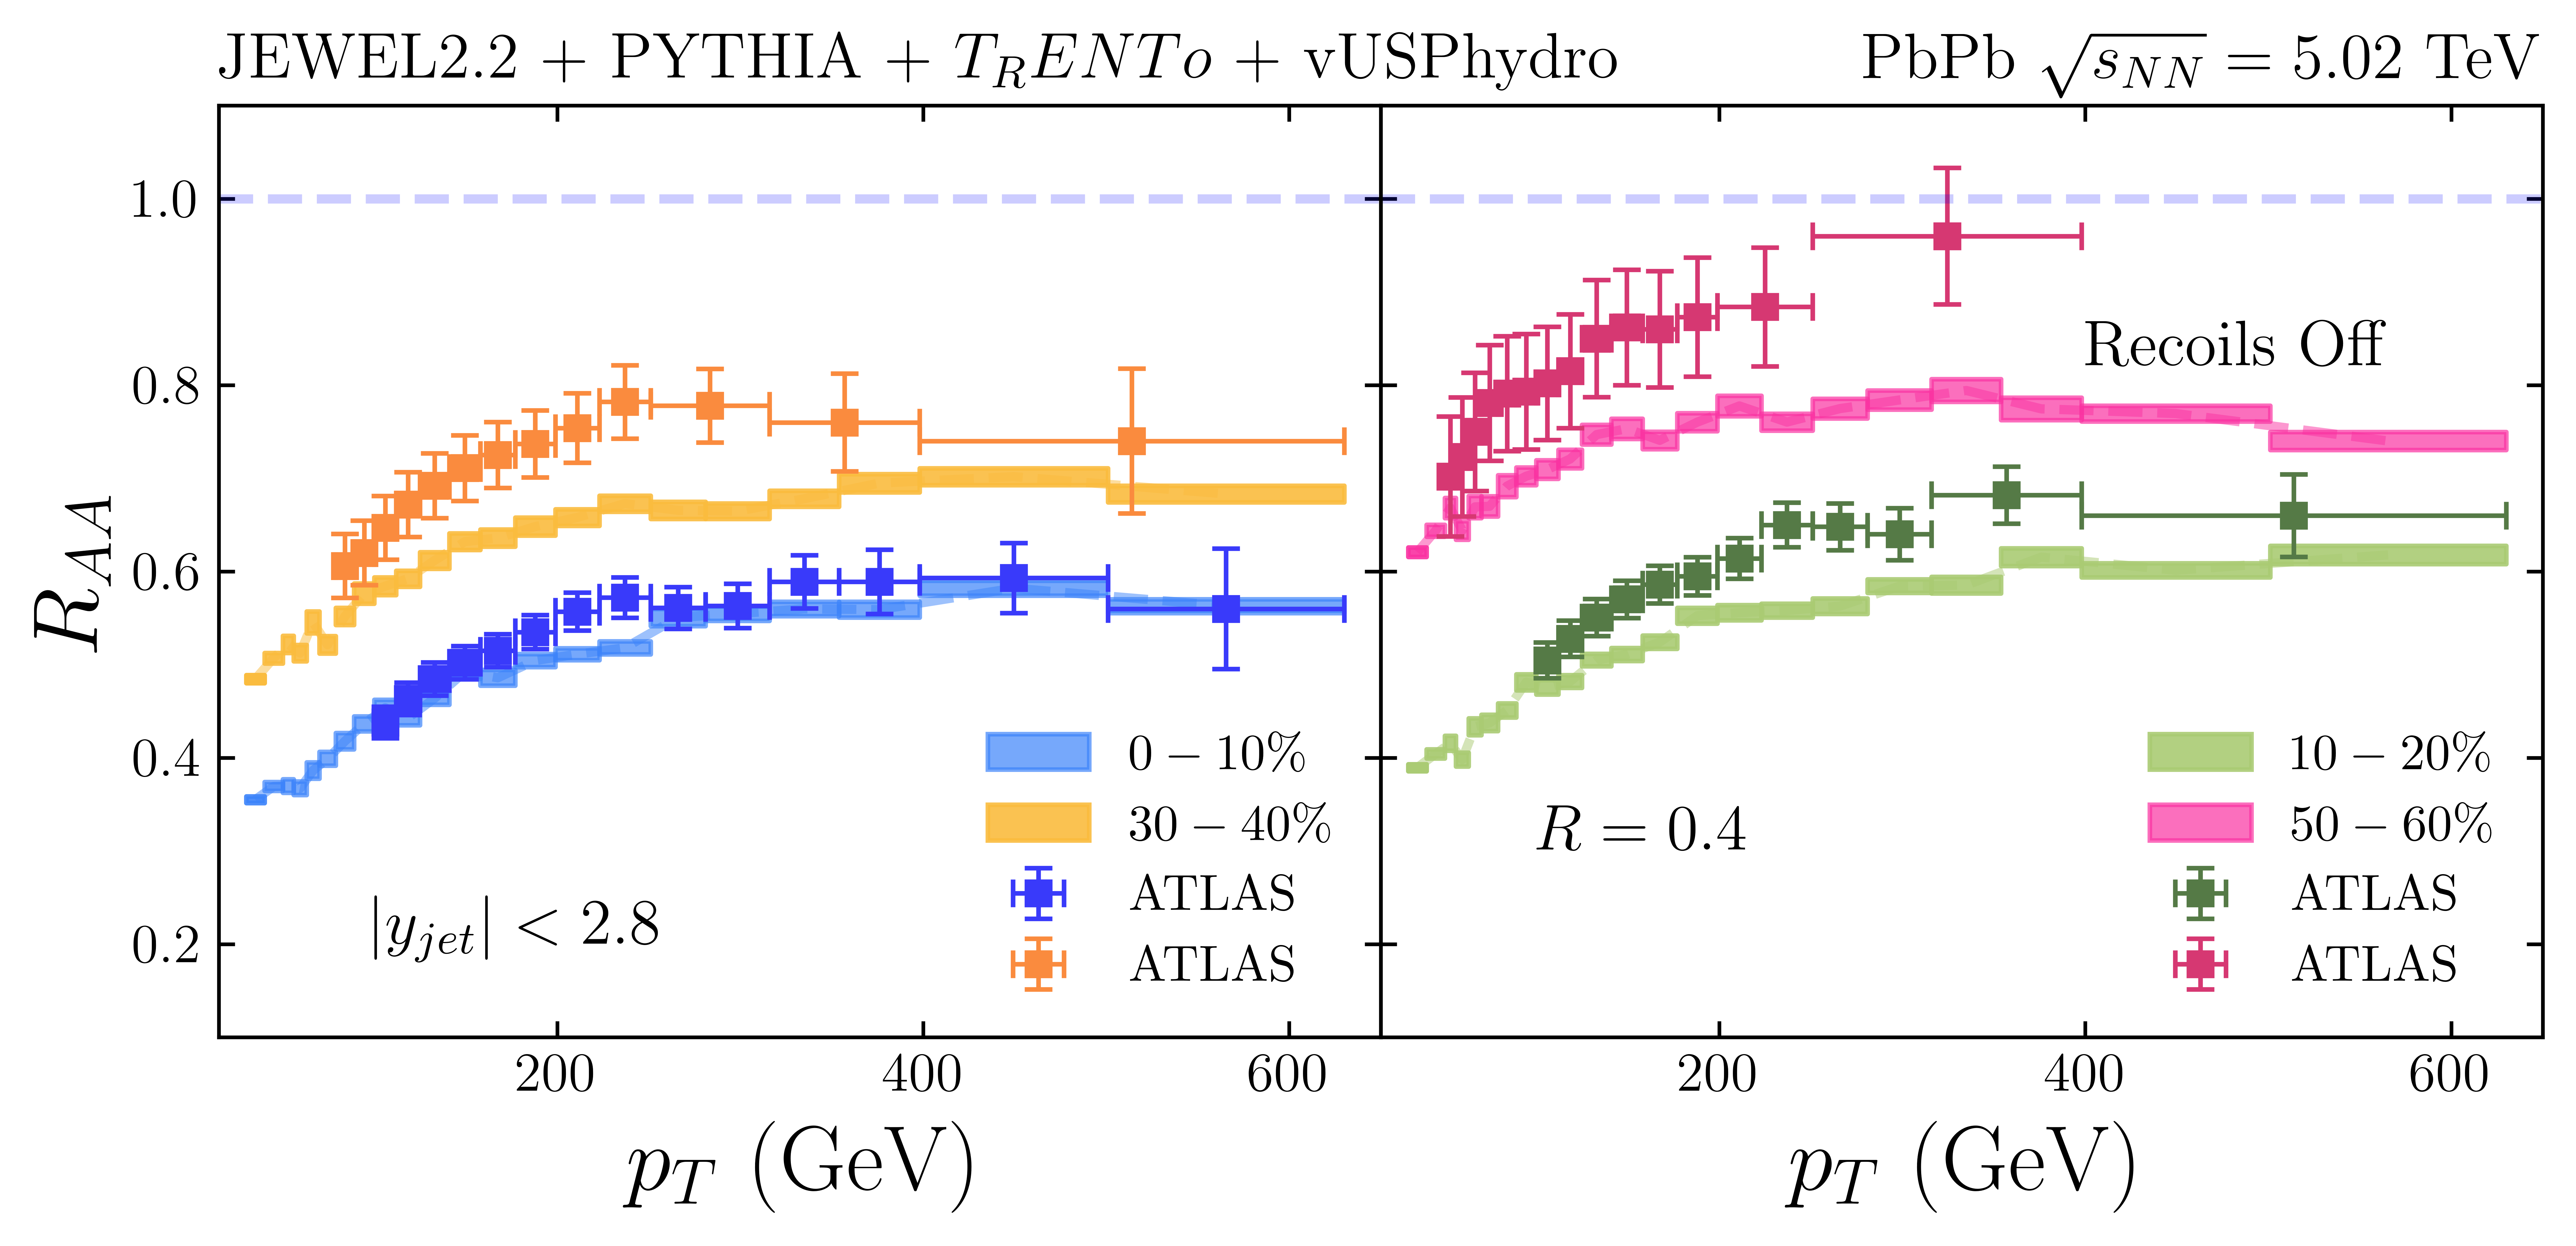

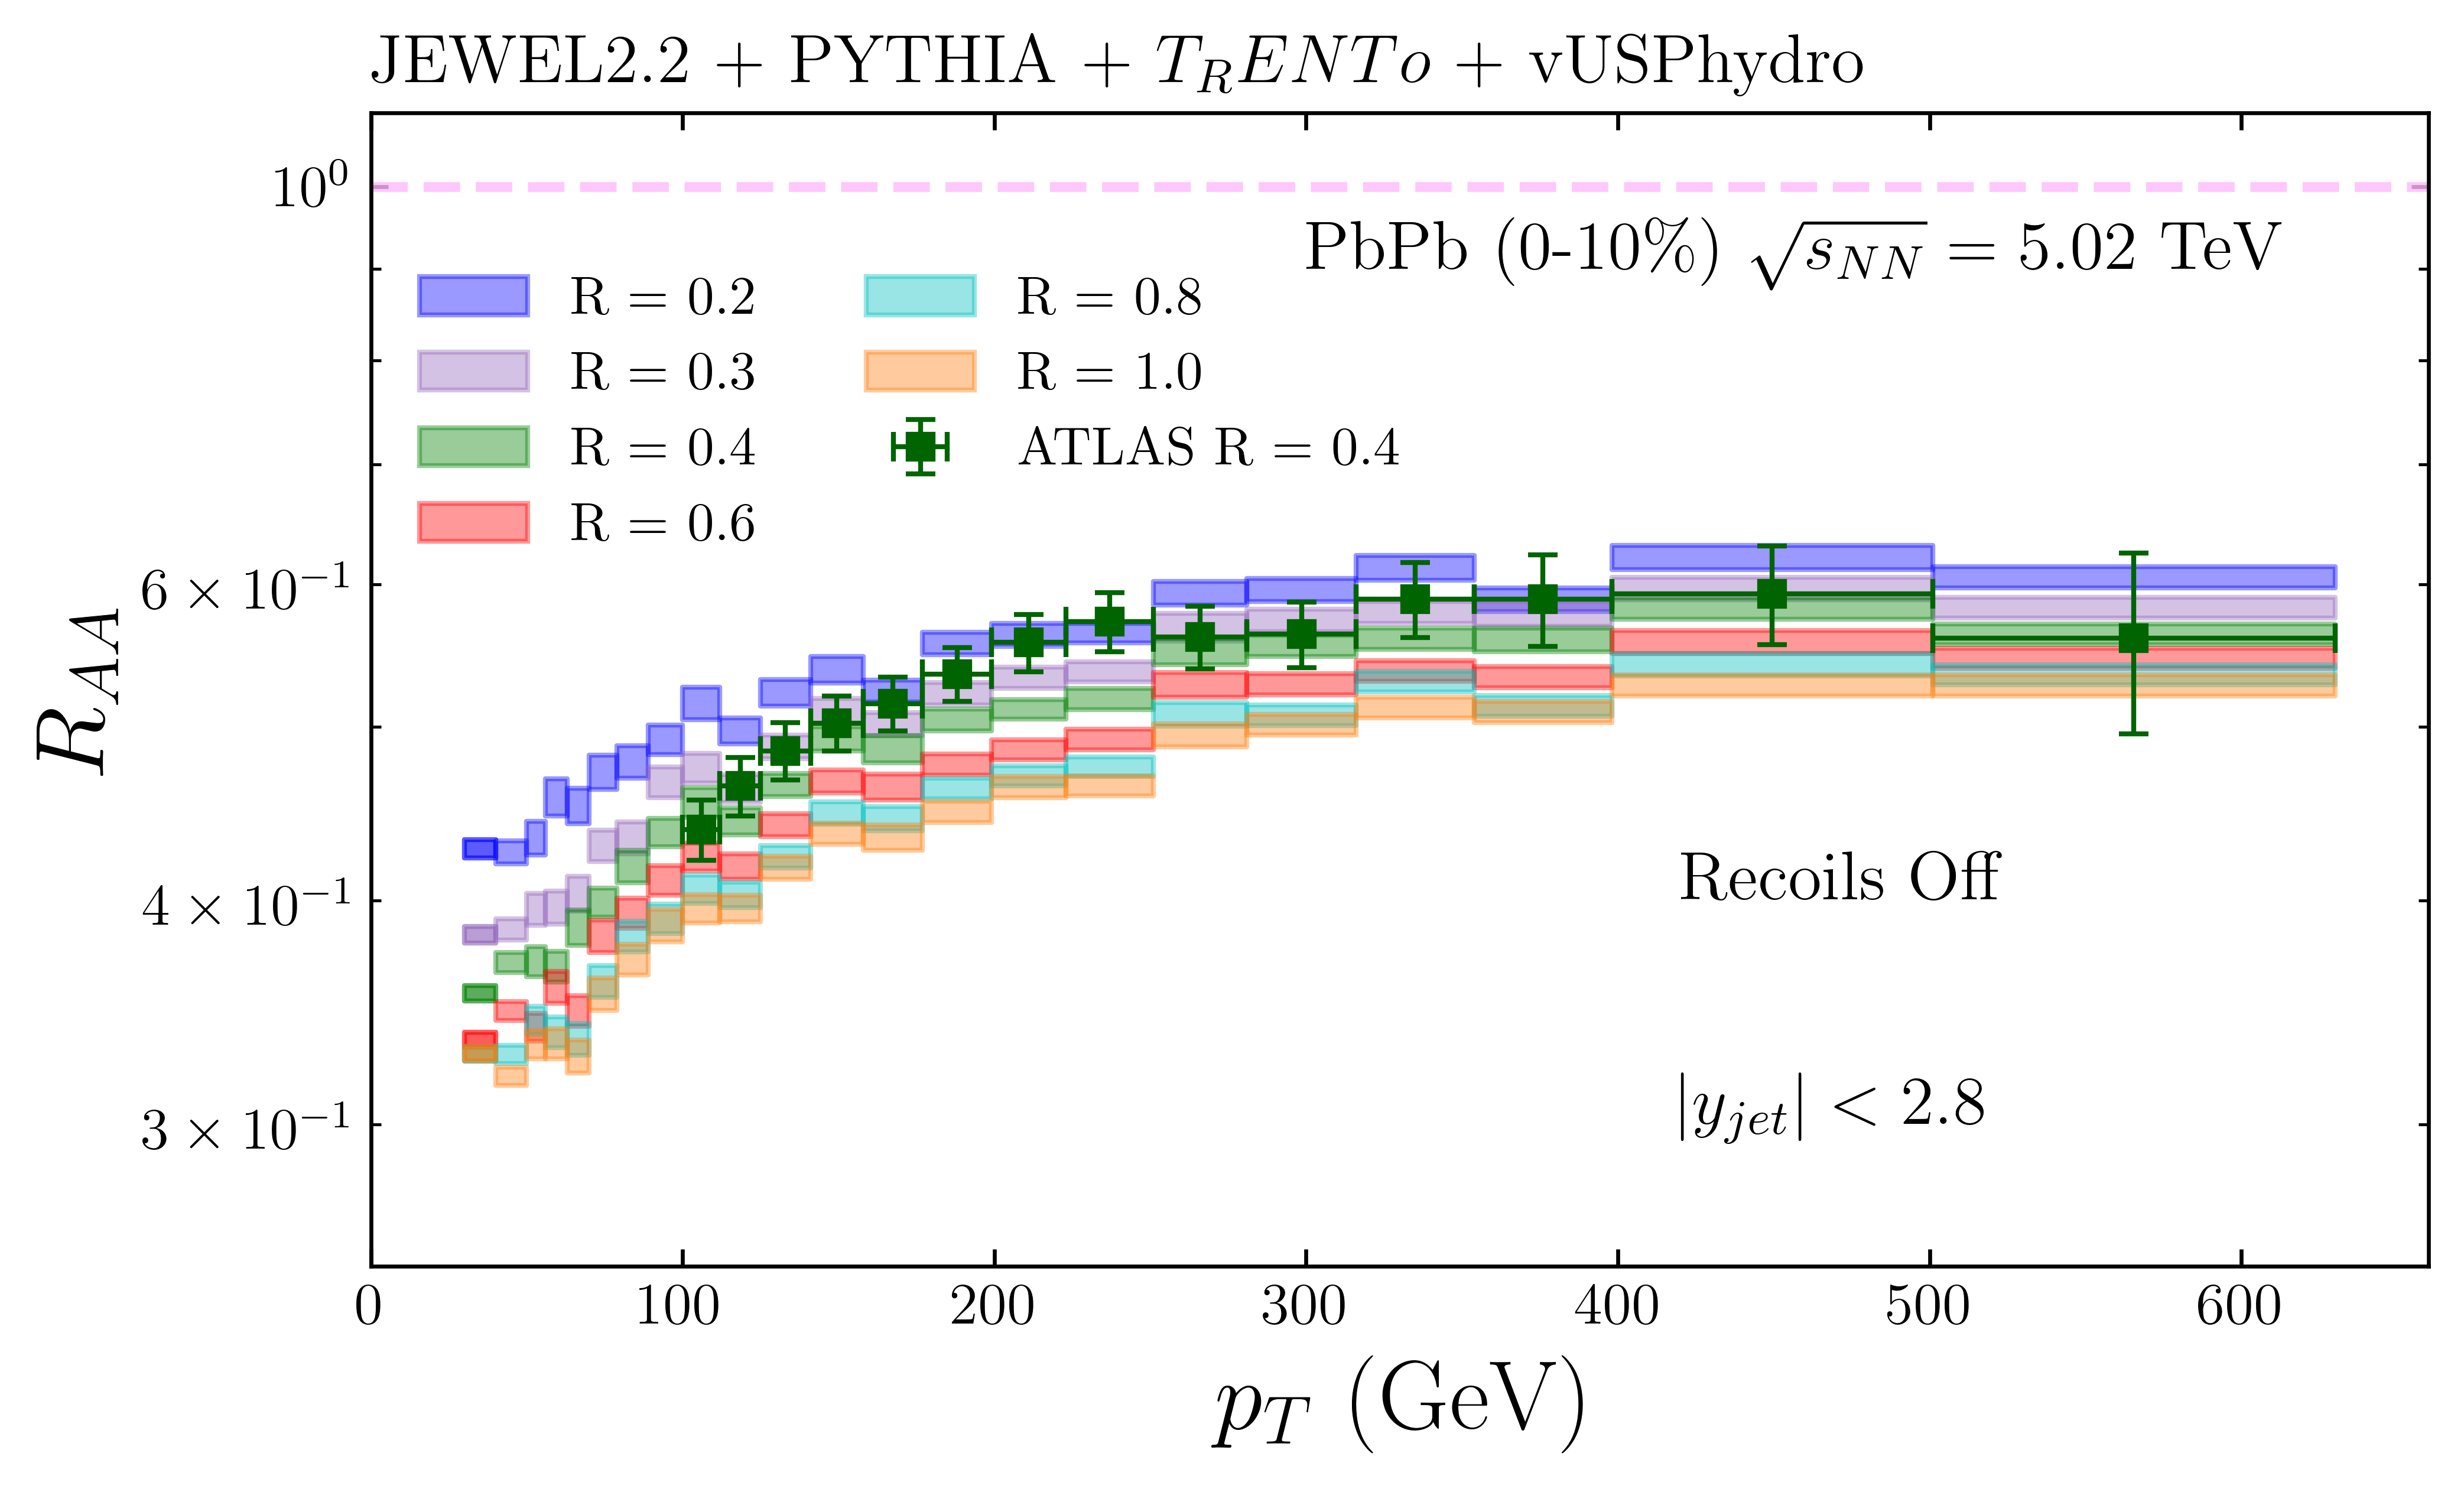

In [29]:
#RAA vUSP FLOW w/o recoil Jewel2.2 5.02 TEV

import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        #max = len(data.xVals()) + 1
        if scatter == '/REF/ATLAS_2018_I1673184/d19-x01-y01':
            max = len(data.xVals()) - 1
        else:
            max = len(data.xVals())

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,4), dpi = 1200)

#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
CENTS = ['0-10','10-20','30-40','50-60']
#CENTS = ['0-10']

for i in range(len(CENTS)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-5Tworec/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    
    
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obs.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]

   
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
    
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0


    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#3C84FA', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#3C84FA')
            
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#3C84FA', linestyle='--')
        #axs1.legend(loc=1)
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#AACB73', label='$10-20\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#AACB73')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#AACB73', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#FABC3E', label='$30-40\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#FABC3E')
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#FABC3E', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#FA32A2', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#FA32A2')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.5, color='#FA32A2', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS/ATLAS_10-20_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d20-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS/ATLAS_30-40_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d22-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS/ATLAS_50-60_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d24-x01-y01')

axs1.errorbar(*ATLAS1, color='#393AFA', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS12, color='#557A46', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs1.errorbar(*ATLAS34, color='#FA8B3E', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='#D63872', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')      
    

# Define plot
axs1.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')
axs2.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')




# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
#plt.xlabel('$p_{T}$ [GeV]')
#plt.ylabel('$R_{AA}$')
#plt.title('Jewel2.4')
#plt.text(50., 0.95, 'Jewel2.4 Default w/ recoils')
#plt.text(50., 0.8, 'R = 0.4')
#plt.text(50., 0.7, '$\sqrt{s_{NN}}=5.02$ TeV')

axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


axs1.legend(loc='lower right')
axs2.legend(loc='lower right')

plt.sca(axs1)
#plt.title('JEWEL + PYTHIA', loc='left', fontsize = 14)
plt.title('JEWEL2.2 + PYTHIA + $T_{R}ENTo$ + vUSPhydro', loc='left', fontsize = 14)
axs2.set_title('PbPb $\sqrt{s_{NN}} = 5.02$ TeV', loc='right', fontsize = 14)
axs1.text(100., 0.2,'$|y_{jet}|<2.8$', fontsize = 14)
axs2.text(100., 0.3,'$R = 0.4$', fontsize = 14)
axs2.text(400., 0.82,'Recoils Off', fontsize = 14)
#axs2.text(400., 0.3,'w/ filtering', fontsize = 14)



#plt.legend(loc=1)
axs1.set_xlim(15., 650.)
axs1.set_ylim(0.1, 1.1)
axs2.set_xlim(15., 650.)
axs2.set_ylim(0.1, 1.1)


plt.savefig('./Figures/5.02TeV/vTj2-5Tworec_raa_cents_R0.4.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Tworec_raa_cents_R0.4.png')

#Mostrar gráfico
plt.show()

########################################################################################################################################

#R comparation vUSPhydro w/o rec 5.02 TeV

yodapp = [] 
yodaPbPb = []
obs = []



plt.figure(2)
            
#Plot dos dados experimentais            
ATLAS = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')

plt.errorbar(*ATLAS, color='darkgreen', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS R = 0.4')       





R = [0.2,0.3,0.4,0.6,0.8,1.0]

CENTS = '0-10'

for i in range(len(R)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R[i])+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-5Tworec/'+str(CENTS)+'_raa_R'+str(R[i])+'.yoda')

    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R[i]))
    
    
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]      
                    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)

    #PbPb_jet.rebin(2)
    #pp_jet.rebin(2)
          
    raa = PbPb_jet / pp_jet
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
                    
                

    arr = [x, y, yerr, xerr]

    minpt = 0


    if (R[i] == 0.2):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b', label='R = 0.2')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b')
            
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='b', linestyle='--')
    
    if (R[i] == 0.3):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple', label='R = 0.3')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='tab:purple', linestyle='--')
            
    if (R[i] == 0.4):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g', label='R = 0.4')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='g', linestyle='--')
            
    if (R[i] == 0.6):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r', label='R = 0.6')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='r', linestyle='--')
            
    if (R[i] == 0.8):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c', label='R = 0.8')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='c', linestyle='--')
            
    if (R[i] == 1.0):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange', label='R = 1.0')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.2, color='tab:orange', linestyle='--')

            

     
            

    
    

# Define plot
plt.axhline(y=1.0, xmin=0., xmax=1200., alpha=0.8, color='#ffbafc', linestyle='--')

plt.figure(2, dpi = 1200)





# plt.errorbar(x, y, yerr, xerr, fmt='o')
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$p_{T}$ (GeV)')
plt.ylabel('$R_{AA}$')
plt.title('JEWEL2.2 + PYTHIA + $T_{R}ENTo$ + vUSPhydro', loc='left', fontsize = 14)

plt.text(300., 0.9, 'PbPb (0-10\%) $\sqrt{s_{NN}} = 5.02$ TeV', fontsize = 14)
plt.text(420., 0.3,'$|y_{jet}|<2.8$', fontsize = 14)
plt.text(420., 0.4,'Recoils Off', fontsize = 14)
plt.legend(ncol=2,loc=2,bbox_to_anchor=(0., 0.9))
#plt.xlim(15., 650.)
plt.ylim(0.25, 1.1)



# Save
#plt.savefig('./imagens/simple_raa_Rs.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Tworec_raa_0-10_Rs.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Tworec_raa_0-10_Rs.png')


#Mostrar gráfico
plt.show()

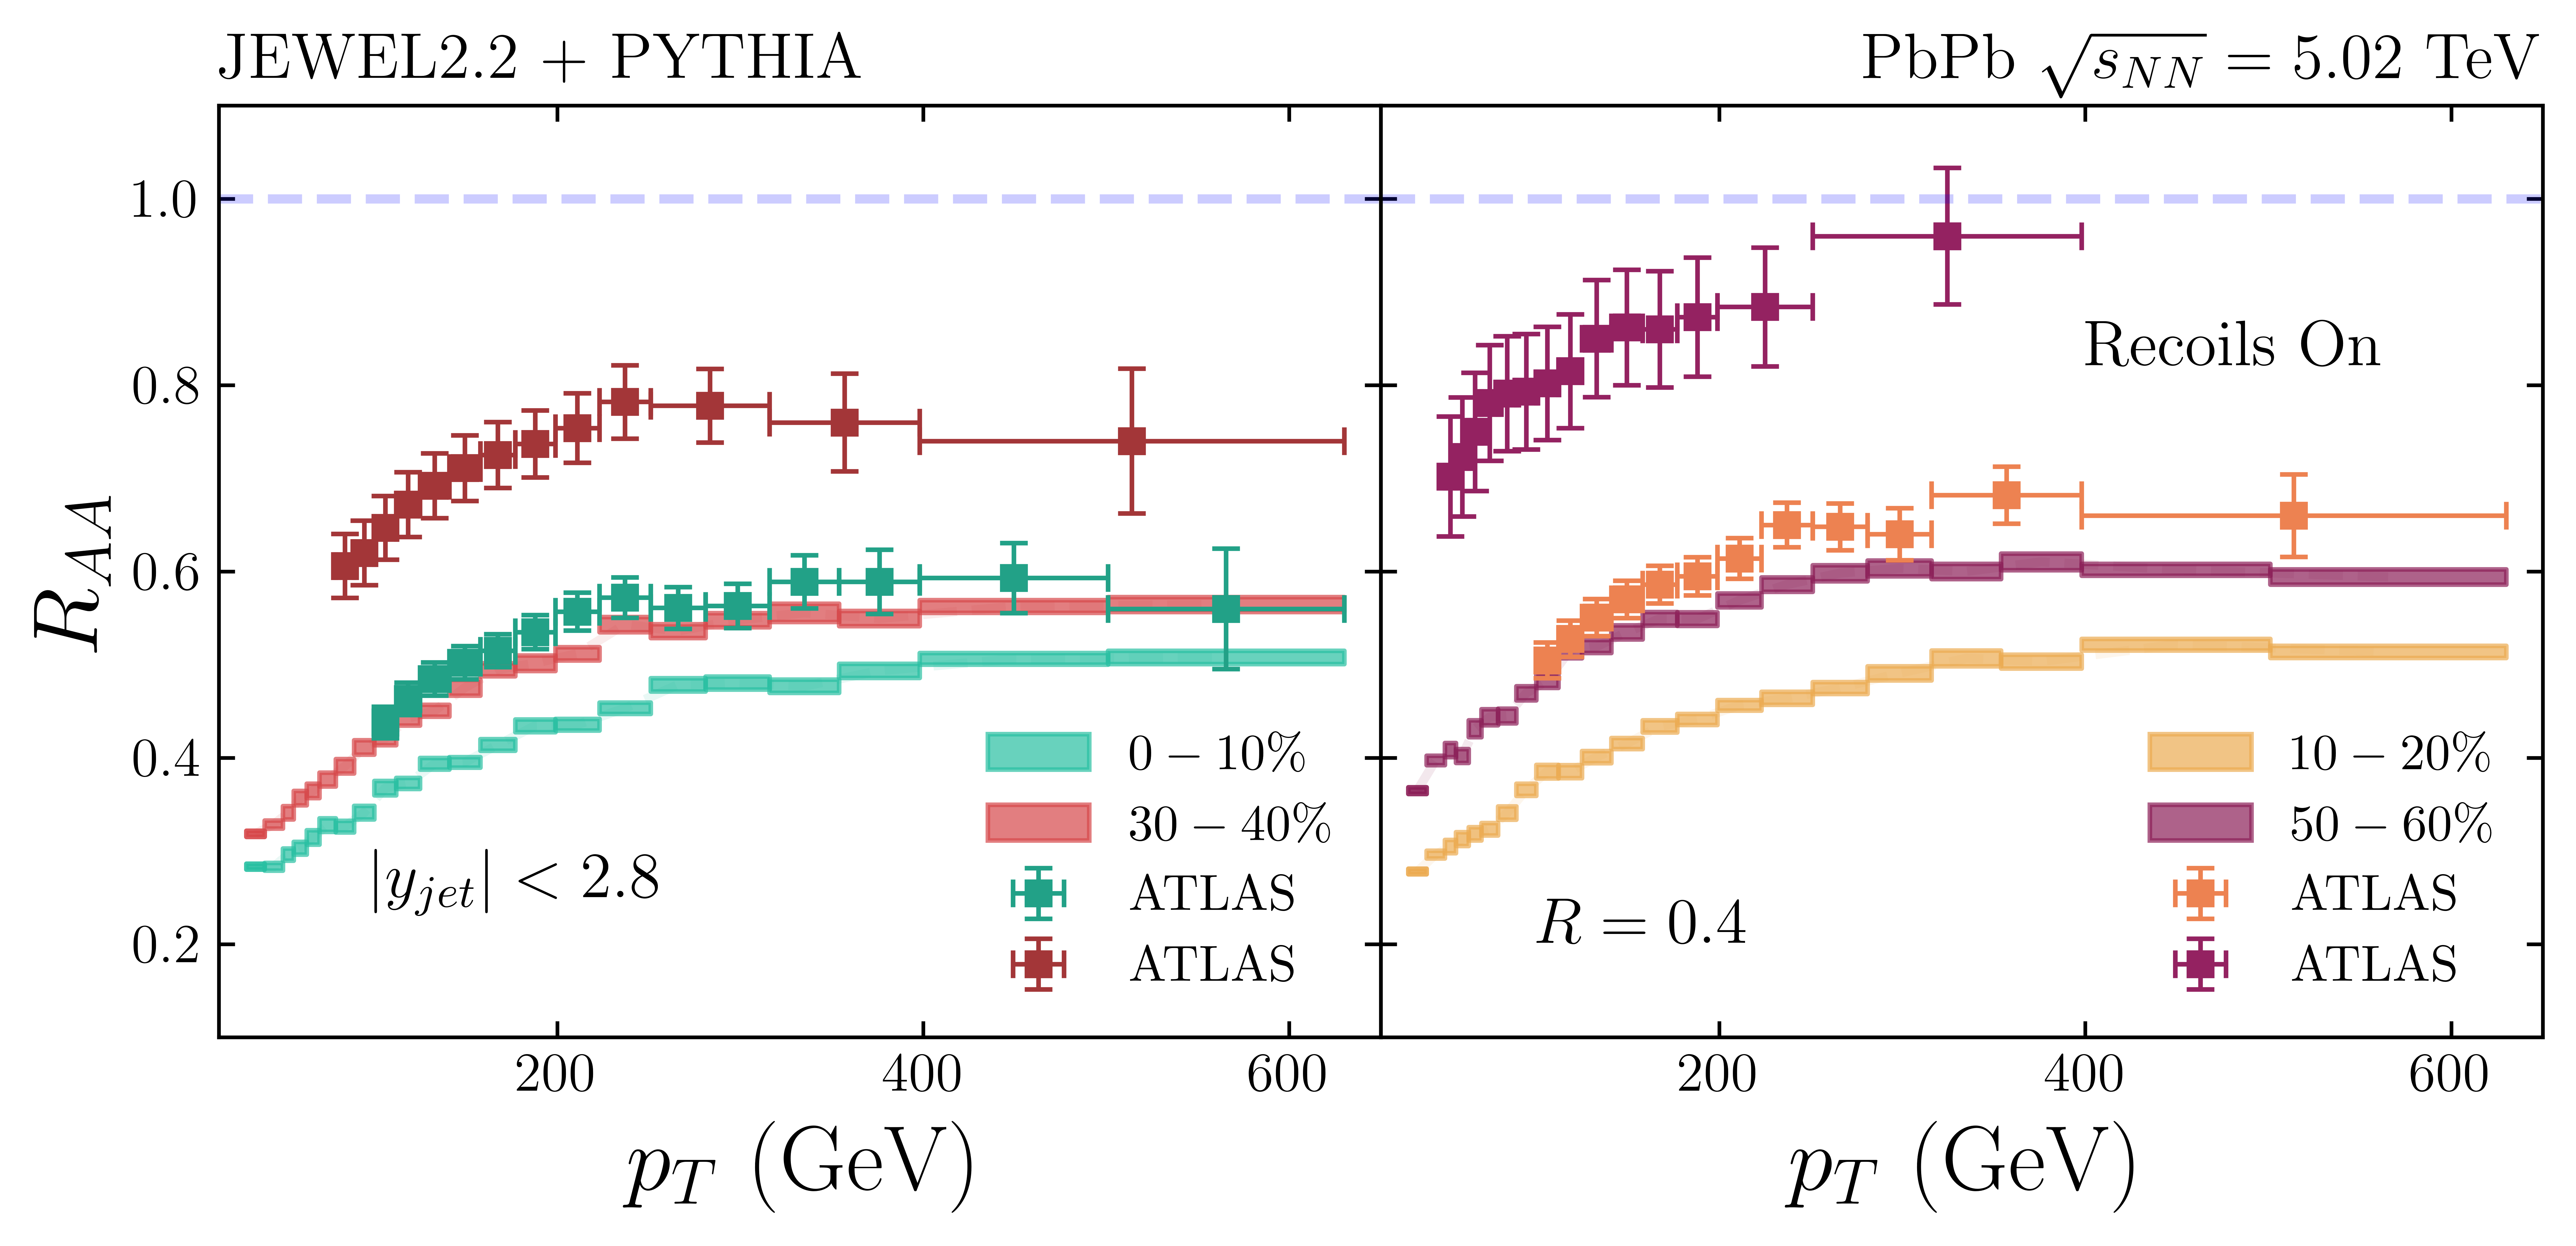

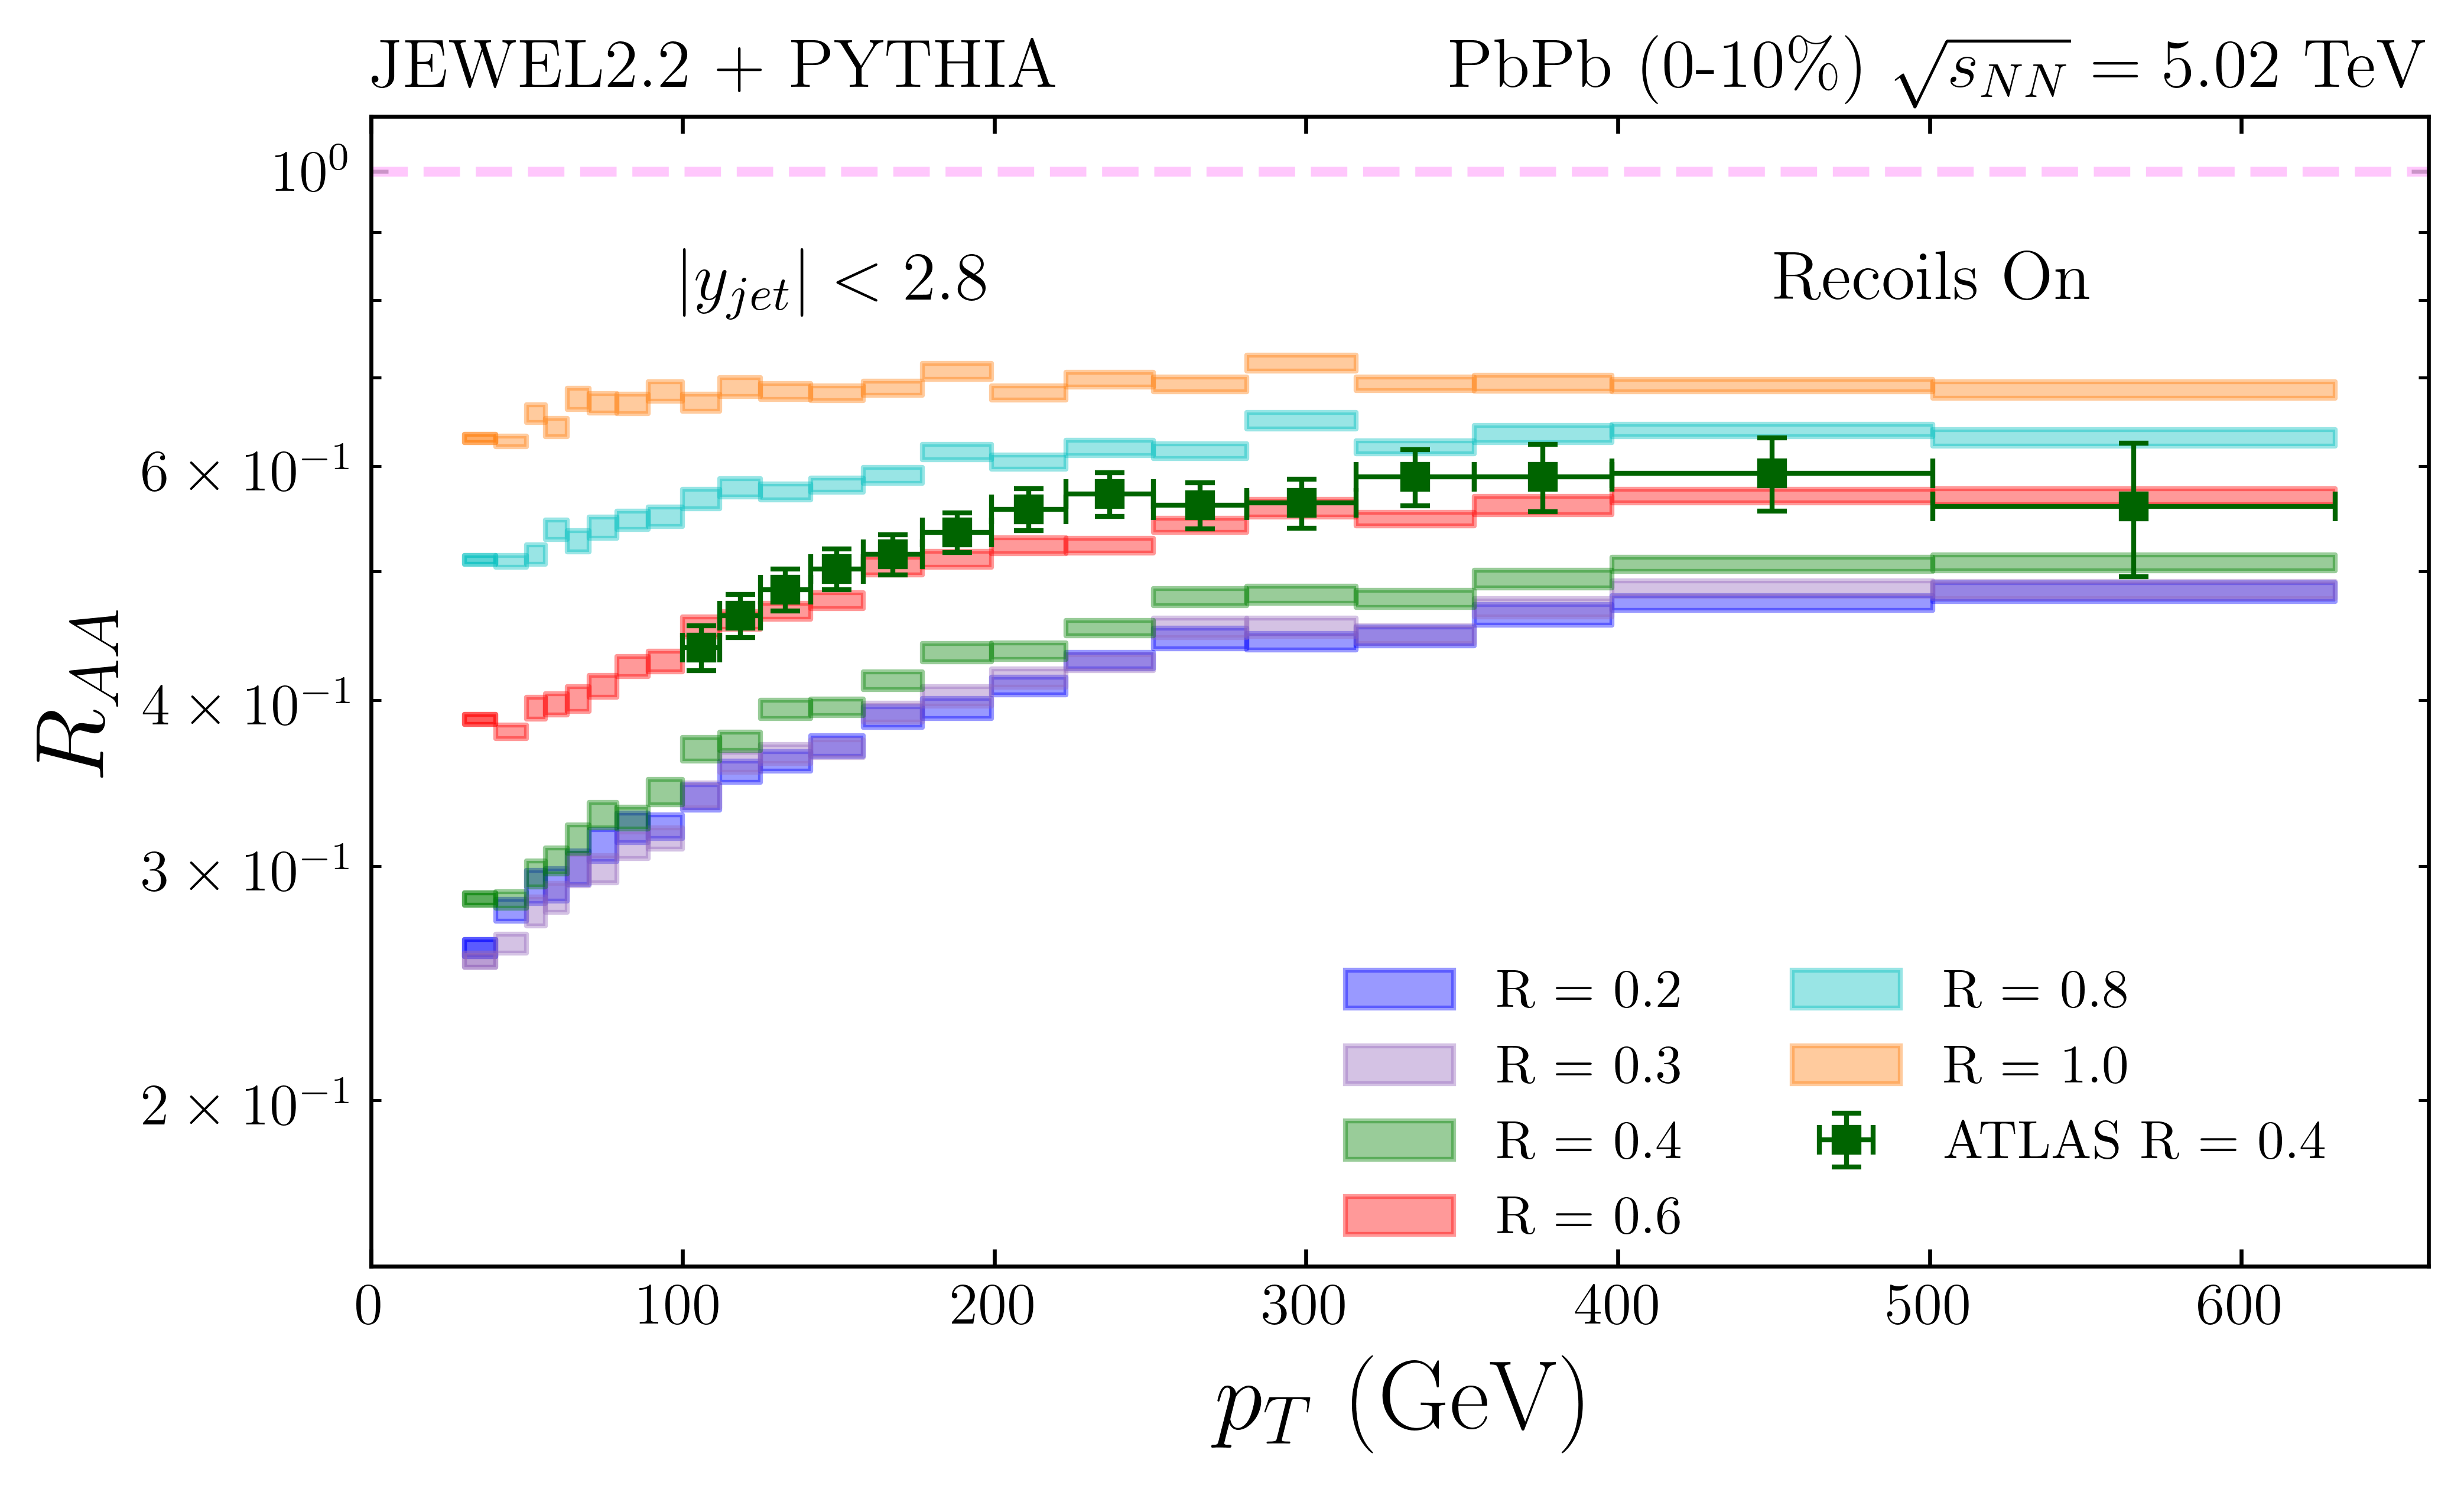

In [31]:
#RAA Default w/ recoil Jewel2.2 5.02 TEV

import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        #max = len(data.xVals()) + 1
        if scatter == '/REF/ATLAS_2018_I1673184/d19-x01-y01':
            max = len(data.xVals()) - 1
        else:
            max = len(data.xVals())

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,4), dpi = 1200)

#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
CENTS = ['0-10','10-20','30-40','50-60']
#CENTS = ['0-10']

for i in range(len(CENTS)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/Dj2-5Twrec/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    
    
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obs.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]

   
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
    
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0


    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#28C0A2', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#28C0A2')
            
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#28C0A2', linestyle='--')
        #axs1.legend(loc=1)
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#ECAB51', label='$10-20\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#ECAB51')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#ECAB51', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#D7484A', label='$30-40\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#D7484A')
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#D7484A', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#8C1F58', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#8C1F58')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#8C1F58', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS/ATLAS_10-20_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d20-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS/ATLAS_30-40_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d22-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS/ATLAS_50-60_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d24-x01-y01')

axs1.errorbar(*ATLAS1, color='#22A187', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS12, color='#ED8251', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs1.errorbar(*ATLAS34, color='#A33638', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='#942261', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
    
    

# Define plot
axs1.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')
axs2.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')




# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
#plt.xlabel('$p_{T}$ [GeV]')
#plt.ylabel('$R_{AA}$')
#plt.title('Jewel2.4')
#plt.text(50., 0.95, 'Jewel2.4 Default w/ recoils')
#plt.text(50., 0.8, 'R = 0.4')
#plt.text(50., 0.7, '$\sqrt{s_{NN}}=5.02$ TeV')

axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


axs1.legend(loc='lower right')
#axs1.legend(loc=2, bbox_to_anchor=(0., 0.95), ncols = 2)
#plt.title('Jewel + PYTHIA $T_R ENTRO$ + vUSPhydro')
axs2.legend(loc='lower right')

plt.sca(axs1)
#plt.title('JEWEL + PYTHIA', loc='left', fontsize = 14)
plt.title('JEWEL2.2 + PYTHIA', loc='left', fontsize = 14)
axs2.set_title('PbPb $\sqrt{s_{NN}} = 5.02$ TeV', loc='right', fontsize = 14)
axs1.text(100., 0.25,'$|y_{jet}|<2.8$', fontsize = 14)
axs2.text(100., 0.2,'$R = 0.4$', fontsize = 14)
axs2.text(400., 0.82,'Recoils On', fontsize = 14)
#axs2.text(400., 0.3,'w/ filtering', fontsize = 14)



#plt.legend(loc=1)
axs1.set_xlim(15., 650.)
axs1.set_ylim(0.1, 1.1)
axs2.set_xlim(15., 650.)
axs2.set_ylim(0.1, 1.1)


plt.savefig('./Figures/5.02TeV/Dj2-5Twrec_raa_cents_R0.4.pdf')
plt.savefig('./Figures/5.02TeV/Dj2-5Twrec_raa_cents_R0.4.png')

#Mostrar gráfico
plt.show()


################################################################################################
#R comparation default w/ rec 5.02 TeV



yodapp = [] 
yodaPbPb = []
obs = []


plt.figure(2)

            
#Plot dos dados experimentais            
ATLAS = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')

plt.errorbar(*ATLAS, color='darkgreen', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS R = 0.4')       





R = [0.2,0.3,0.4,0.6,0.8,1.0]

CENTS = '0-10'

for i in range(len(R)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R[i])+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/Dj2-5Twrec/'+str(CENTS)+'_raa_R'+str(R[i])+'.yoda')

    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R[i]))
    
    
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]      
                    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)

    #PbPb_jet.rebin(2)
    #pp_jet.rebin(2)
          
    raa = PbPb_jet / pp_jet
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
                    
                

    arr = [x, y, yerr, xerr]

    minpt = 0


    if (R[i] == 0.2):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b', label='R = 0.2')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b')
            
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='b', linestyle='--')
    
    if (R[i] == 0.3):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple', label='R = 0.3')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='tab:purple', linestyle='--')
            
    if (R[i] == 0.4):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g', label='R = 0.4')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='g', linestyle='--')
            
    if (R[i] == 0.6):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r', label='R = 0.6')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='r', linestyle='--')
            
    if (R[i] == 0.8):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c', label='R = 0.8')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='c', linestyle='--')
            
    if (R[i] == 1.0):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange', label='R = 1.0')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.2, color='tab:orange', linestyle='--')

            

     
            

    
    

# Define plot
plt.axhline(y=1.0, xmin=0., xmax=1200., alpha=0.8, color='#ffbafc', linestyle='--')

plt.figure(2, dpi = 1200)





# plt.errorbar(x, y, yerr, xerr, fmt='o')
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$p_{T}$ (GeV)')
plt.ylabel('$R_{AA}$')
plt.title('JEWEL2.2 + PYTHIA', loc='left', fontsize = 14)
plt.title('PbPb (0-10\%) $\sqrt{s_{NN}} = 5.02$ TeV', loc='right', fontsize = 14)


#plt.text(400., 0.9, 'PbPb $\sqrt{s_{NN}} = 5.02$ TeV', fontsize = 14)
plt.text(100., 0.8,'$|y_{jet}|<2.8$', fontsize = 14)
plt.text(450., 0.8,'Recoils On', fontsize = 14)
plt.legend(ncol=2,loc=2,bbox_to_anchor=(0.45, 0.3))
#plt.xlim(15., 650.)
plt.ylim(0.15, 1.1)



# Save
#plt.savefig('./imagens/simple_raa_Rs.pdf')
plt.savefig('./Figures/5.02TeV/Dj2-5Twrec_raa_0-10_Rs.pdf')
plt.savefig('./Figures/5.02TeV/Dj2-5Twrec_raa_0-10_Rs.png')


#Mostrar gráfico
plt.show()
 


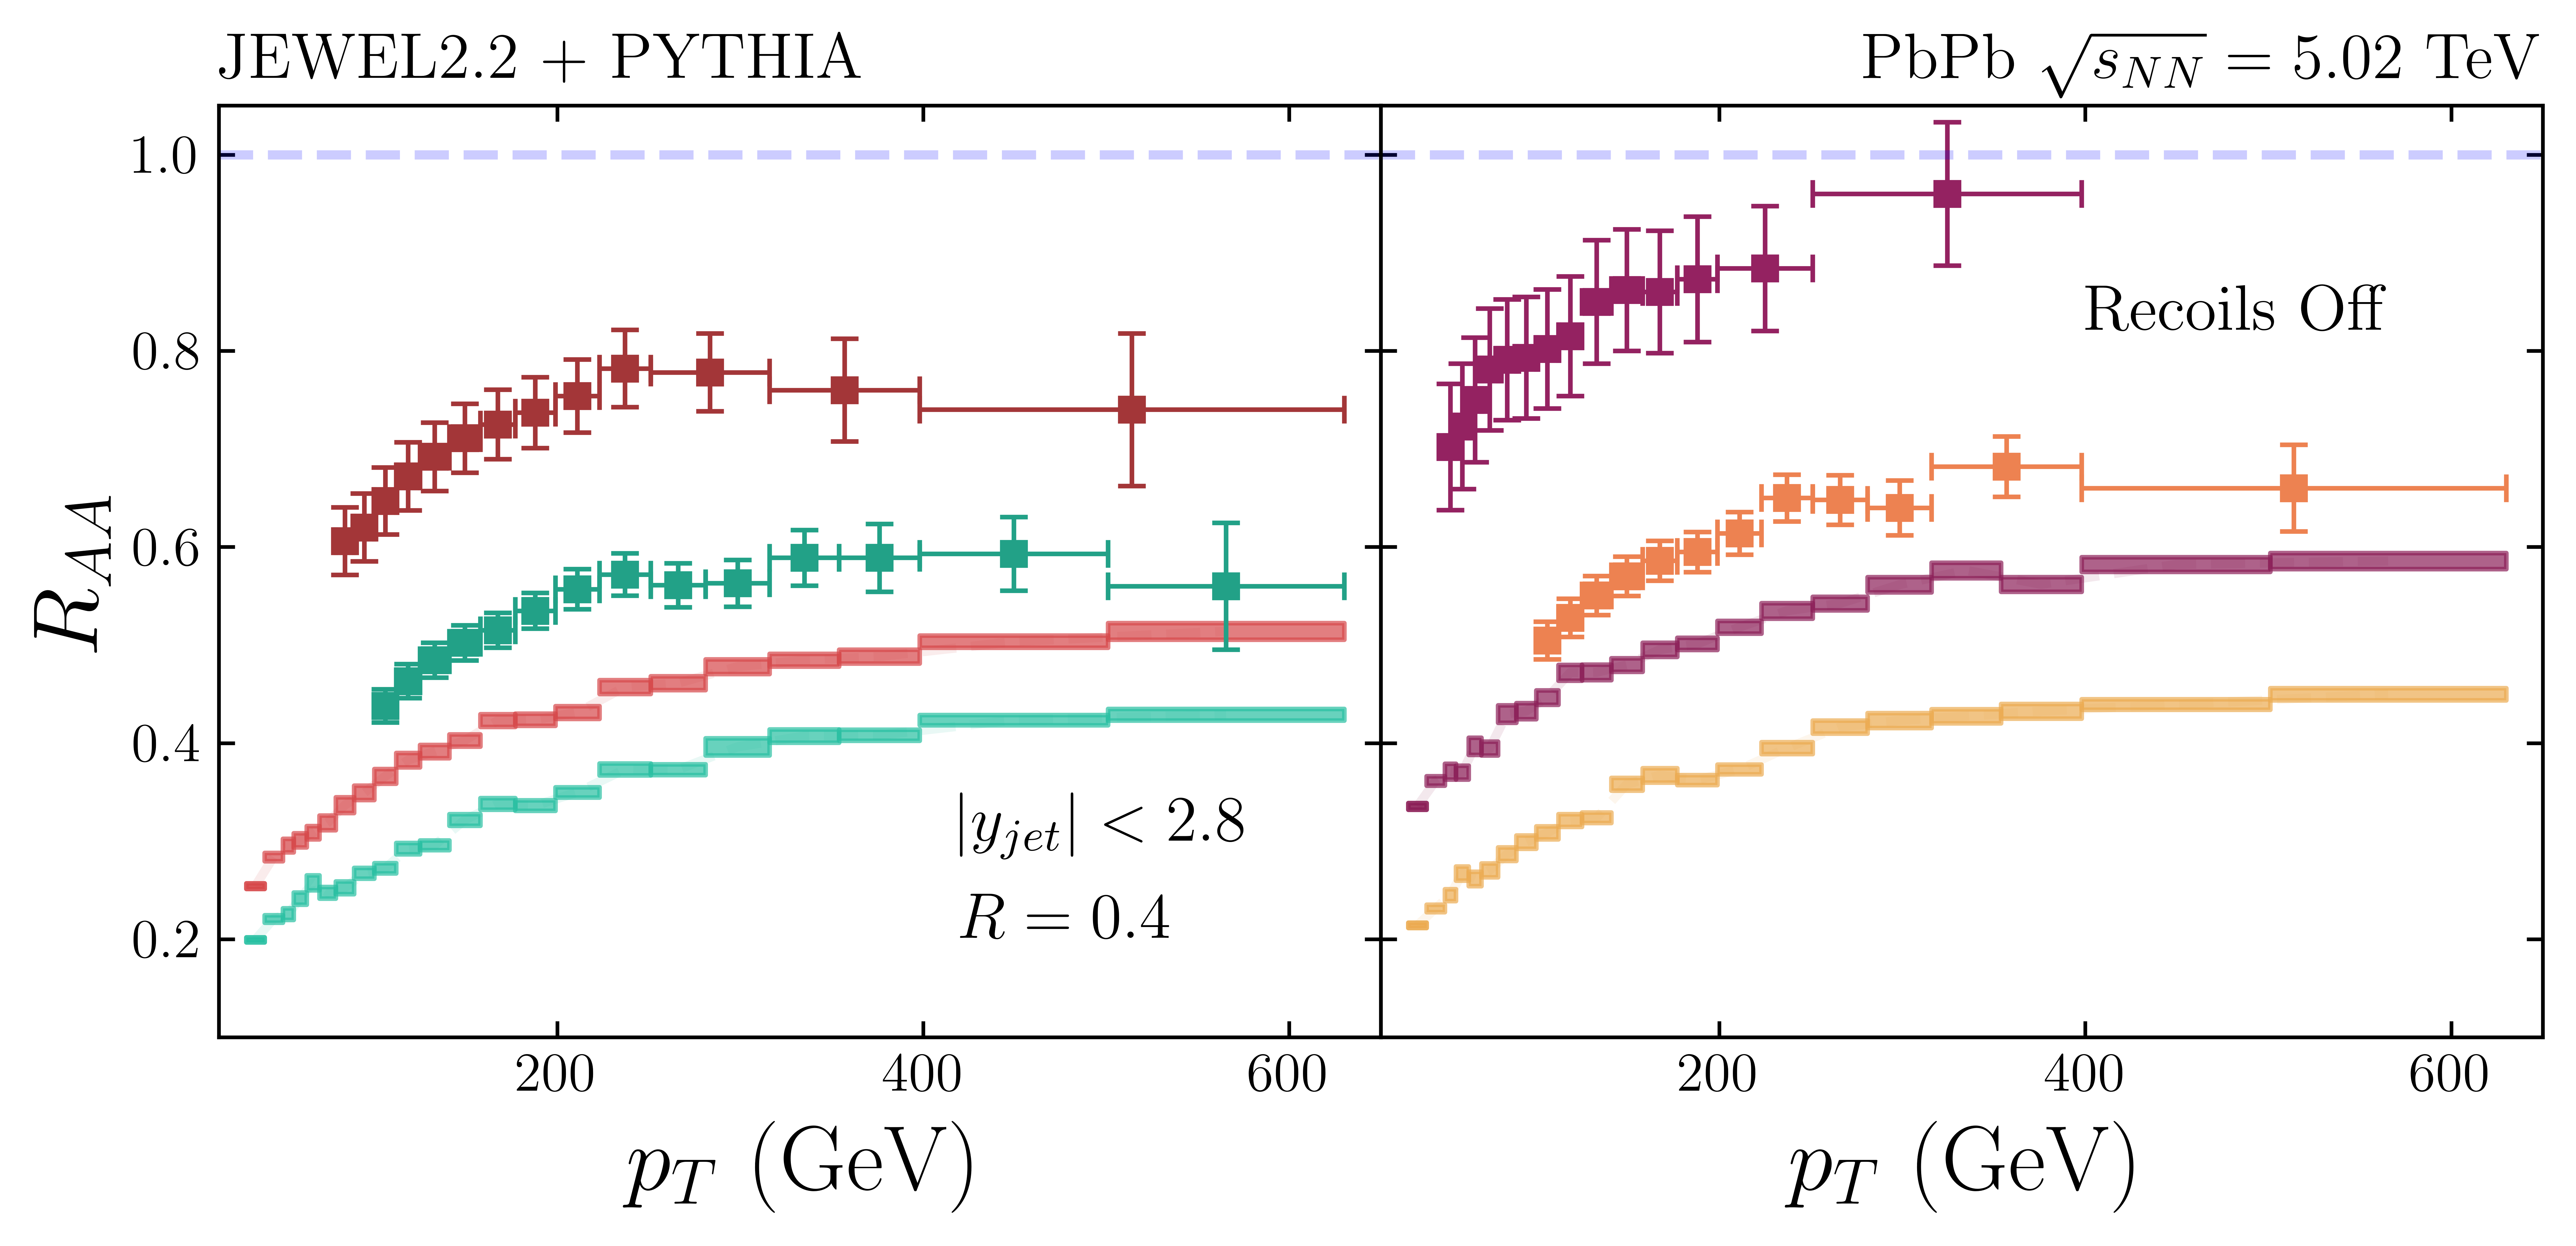

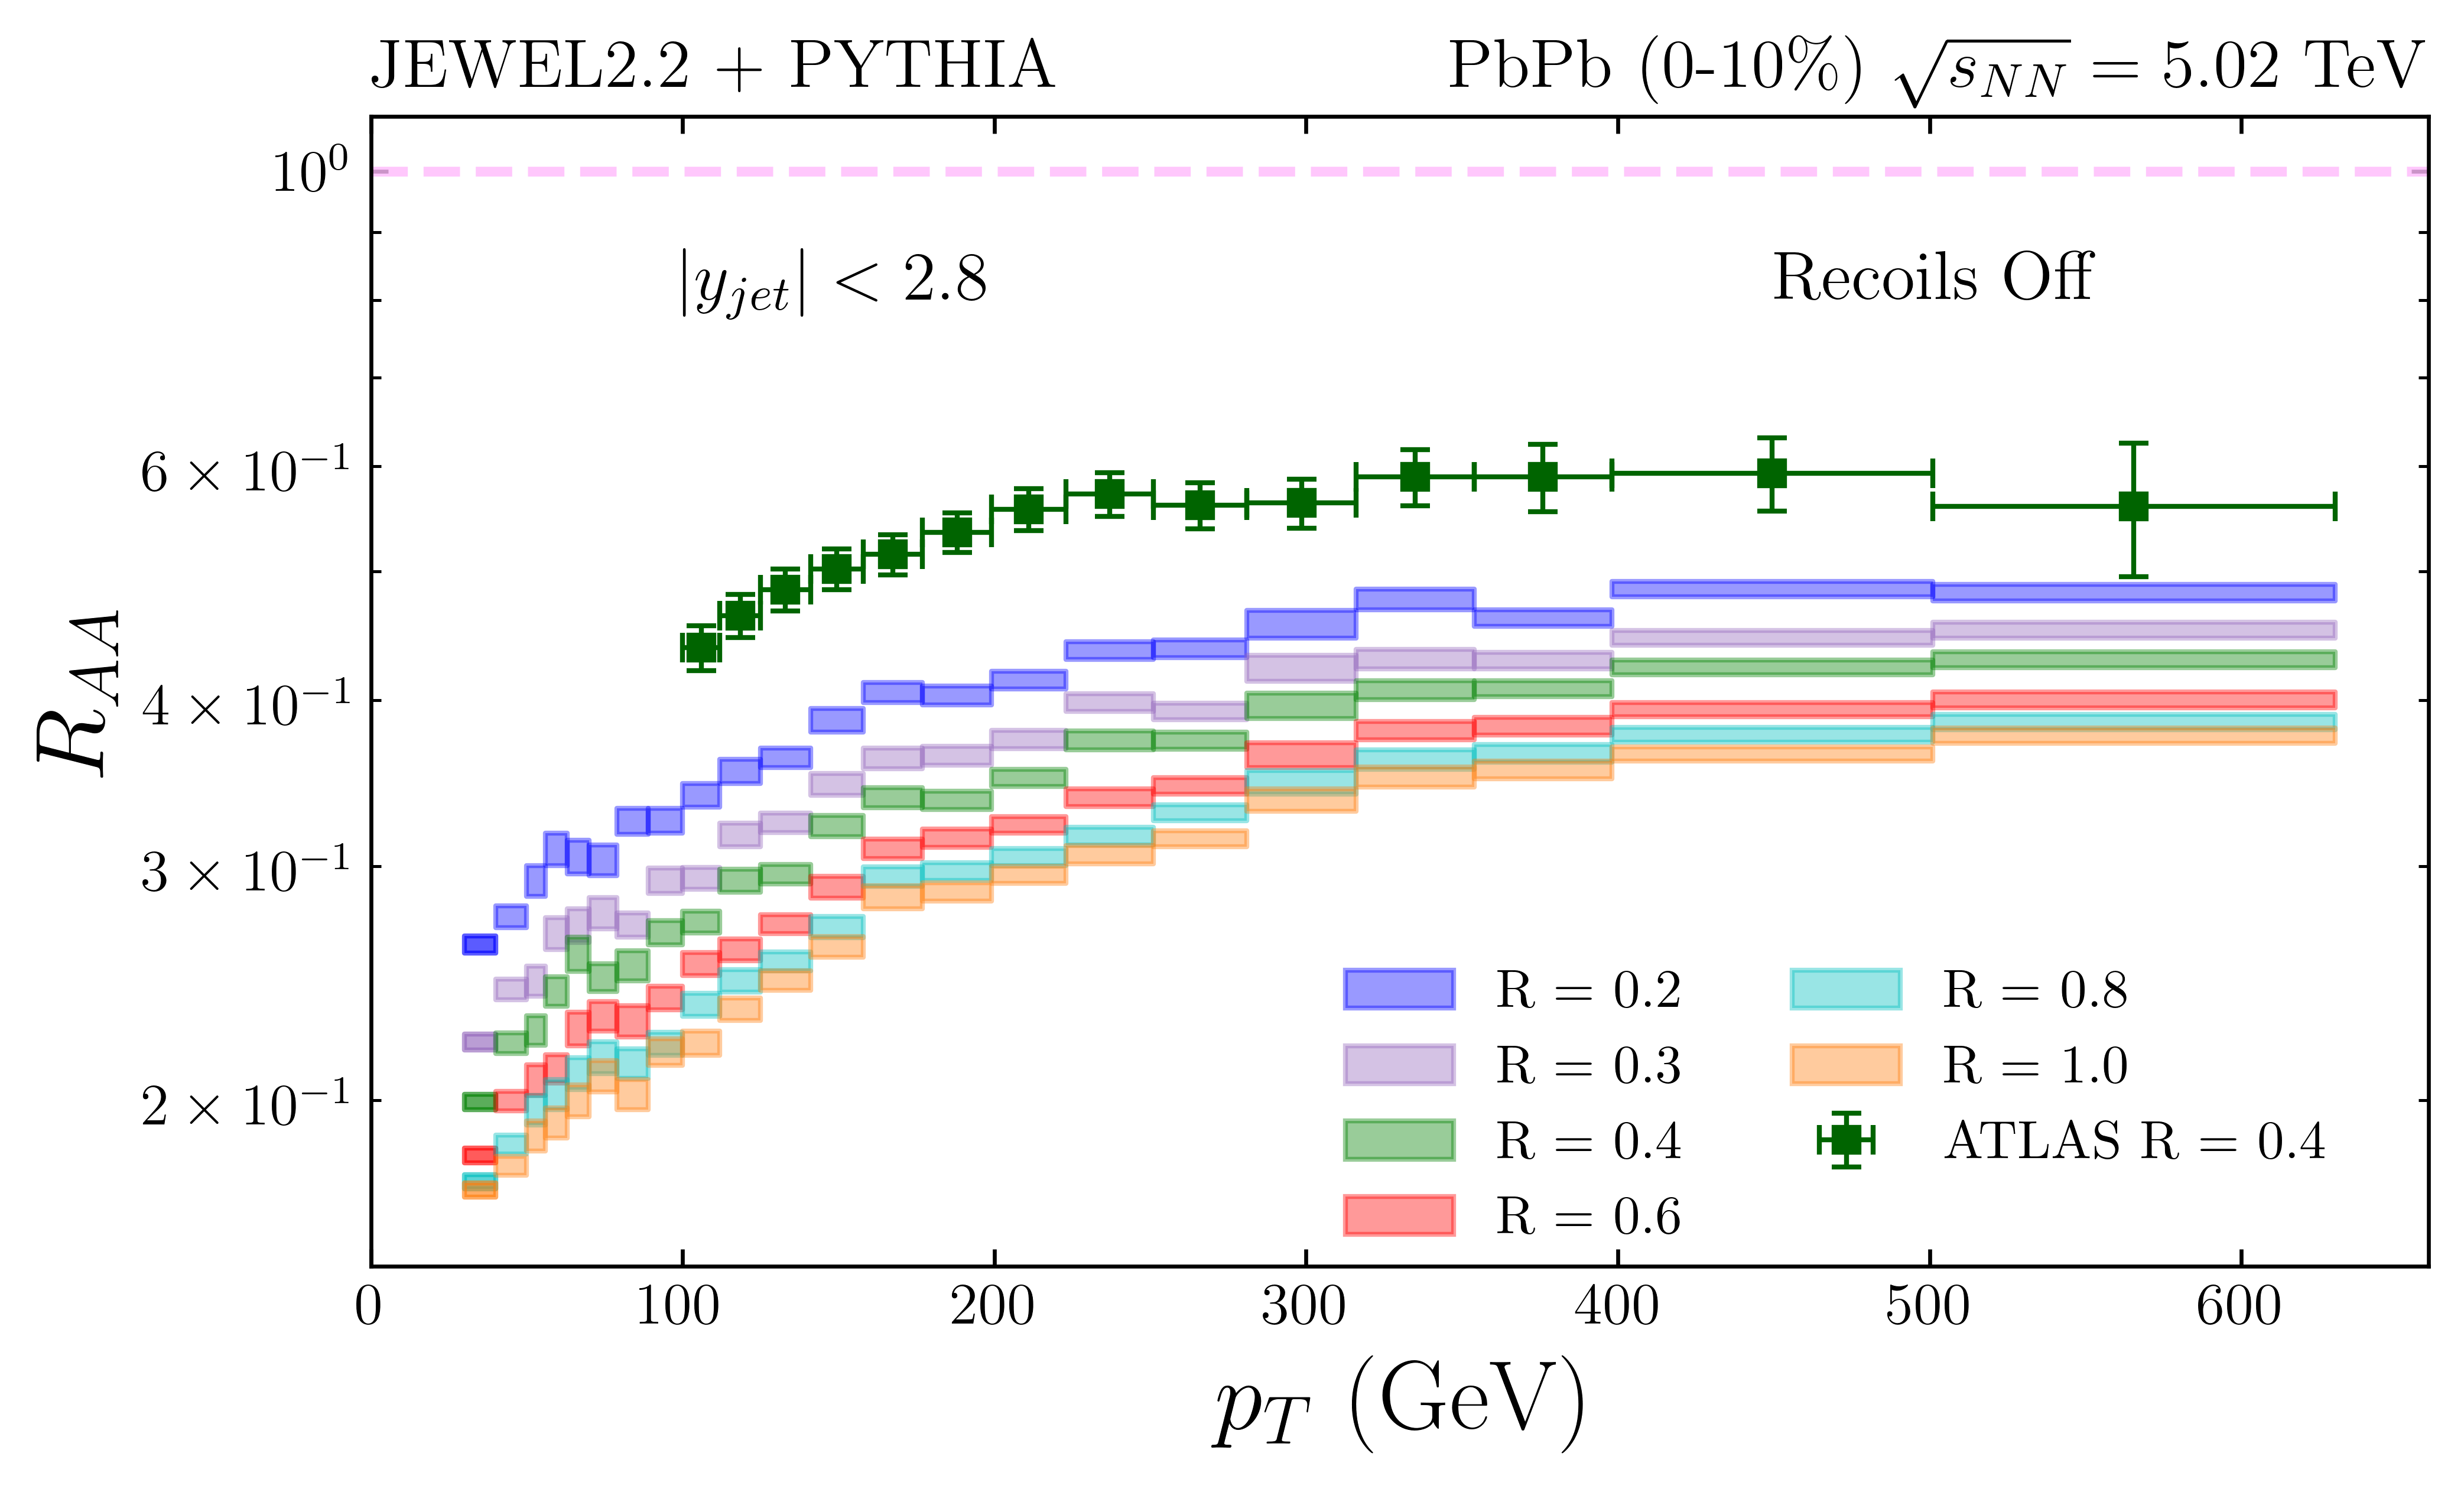

In [33]:
#RAA Default w/o recoil Jewel2.2 5.02 TEV

import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        #max = len(data.xVals()) + 1
        if scatter == '/REF/ATLAS_2018_I1673184/d19-x01-y01':
            max = len(data.xVals()) - 1
        else:
            max = len(data.xVals())

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]






plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


yodapp = [] 
yodaPbPb = []
obs = []
obspp = []


fig, (axs1, axs2) = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=True,
                                       gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,4), dpi = 1200)

#R = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4
CENTS = ['0-10','10-20','30-40','50-60']
#CENTS = ['0-10']

for i in range(len(CENTS)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R)+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/Dj2-5Tworec/'+str(CENTS[i])+'_raa_R'+str(R)+'.yoda')
    
    
    
    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obs.append('/RAA_ATLAS/JetpT_R'+str(R))
    #obspp.append('/RAA_ATLAS/JetpT_R'+str(R))
    
    
    
    
    
  
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]

   
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    
                    
    
    raa = PbPb_jet / pp_jet
    
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    arr = [x, y, yerr, xerr]
    
    
    
    
    minpt = 0

    if (CENTS[i] == '0-10'):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#28C0A2', label='$0-10\%$')

            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#28C0A2')
            
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#28C0A2', linestyle='--')
        #axs1.legend(loc=1)
    
    
    if (CENTS[i] == '10-20'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#ECAB51', label='$10-20\%$')
            
            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#ECAB51')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#ECAB51', linestyle='--')
        #axs1.legend(loc=1)
            
    if (CENTS[i] == '30-40'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#D7484A', label='$30-40\%$')
            
            axs1.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#D7484A')
            
        axs1.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#D7484A', linestyle='--')
        #axs2.legend(loc=1)
     
    if (CENTS[i] == '50-60'):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#8C1F58', label='$50-60\%$')

            axs2.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.7, color='#8C1F58')
            
        axs2.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='#8C1F58', linestyle='--')
        #axs2.legend(loc=1)
            
  




     
            
#Plot dos dados experimentais            
ATLAS1 = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')
ATLAS12 = DataFromExperiment('Data/ATLAS/ATLAS_10-20_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d20-x01-y01')
ATLAS34 = DataFromExperiment('Data/ATLAS/ATLAS_30-40_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d22-x01-y01')
ATLAS56 = DataFromExperiment('Data/ATLAS/ATLAS_50-60_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d24-x01-y01')

axs1.errorbar(*ATLAS1, color='#22A187', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS12, color='#ED8251', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs1.errorbar(*ATLAS34, color='#A33638', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       
axs2.errorbar(*ATLAS56, color='#942261', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')
    
    

# Define plot
axs1.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')
axs2.axhline(y=1.0, xmin=0., xmax=650., alpha=0.2, color='b', linestyle='--')




# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
#plt.xlabel('$p_{T}$ [GeV]')
#plt.ylabel('$R_{AA}$')
#plt.title('Jewel2.4')
#plt.text(50., 0.95, 'Jewel2.4 Default w/ recoils')
#plt.text(50., 0.8, 'R = 0.4')
#plt.text(50., 0.7, '$\sqrt{s_{NN}}=5.02$ TeV')

axs1.set_xlabel('$p_{T}$ (GeV)')
axs1.set_ylabel('$R_{AA}$')
axs2.set_xlabel('$p_{T}$ (GeV)')


#axs1.legend(loc=2, bbox_to_anchor=(1., 0.9))
#axs1.legend(loc=2, bbox_to_anchor=(0., 0.95), ncols = 2)
#plt.title('Jewel + PYTHIA $T_R ENTRO$ + vUSPhydro')
#axs2.legend(loc='lower left', bbox_to_anchor=(0., 0.), ncols = 2)

plt.sca(axs1)
#plt.title('JEWEL + PYTHIA', loc='left', fontsize = 14)
plt.title('JEWEL2.2 + PYTHIA', loc='left', fontsize = 14)
axs2.set_title('PbPb $\sqrt{s_{NN}} = 5.02$ TeV', loc='right', fontsize = 14)
axs1.text(420., 0.3,'$|y_{jet}|<2.8$', fontsize = 14)
axs1.text(420., 0.2,'$R = 0.4$', fontsize = 14)
axs2.text(400., 0.82,'Recoils Off', fontsize = 14)
#axs2.text(400., 0.3,'w/ filtering', fontsize = 14)



#plt.legend(loc=1)
axs1.set_xlim(15., 650.)
axs1.set_ylim(0.1, 1.05)
axs2.set_xlim(15., 650.)
axs2.set_ylim(0.1, 1.05)


plt.savefig('./Figures/5.02TeV/Dj2-5Tworec_raa_cents_R0.4.pdf')
plt.savefig('./Figures/5.02TeV/Dj2-5Tworec_raa_cents_R0.4.png')

#Mostrar gráfico
plt.show()

######################################################################################
#R comparation default w/o rec default 5.02 TeV


yodapp = [] 
yodaPbPb = []
obs = []



plt.figure(2)

            
#Plot dos dados experimentais            
ATLAS = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')

plt.errorbar(*ATLAS, color='darkgreen', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS R = 0.4')       





R = [0.2,0.3,0.4,0.6,0.8,1.0]

CENTS = '0-10'

for i in range(len(R)):
    yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R'+str(R[i])+'.yoda')
    yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/Dj2-5Tworec/'+str(CENTS)+'_raa_R'+str(R[i])+'.yoda')

    obs.append('/USPJWL_JETSPEC/JetpT_R'+str(R[i]))
    
    
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]
    
    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]      
                    
                    
    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)
                    
                    
                    
    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)

    #PbPb_jet.rebin(2)
    #pp_jet.rebin(2)
          
    raa = PbPb_jet / pp_jet
    
    
    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)
                    
                

    arr = [x, y, yerr, xerr]

    minpt = 0


    if (R[i] == 0.2):        

        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b', label='R = 0.2')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='b')
            
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='b', linestyle='--')
    
    if (R[i] == 0.3):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple', label='R = 0.3')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:purple')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='tab:purple', linestyle='--')
            
    if (R[i] == 0.4):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g', label='R = 0.4')
            
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='g')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='g', linestyle='--')
            
    if (R[i] == 0.6):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r', label='R = 0.6')

            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='r')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='r', linestyle='--')
            
    if (R[i] == 0.8):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k==0):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c', label='R = 0.8')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='c')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.1, color='c', linestyle='--')
            
    if (R[i] == 1.0):
        for k in range(minpt, arr[0].size-1):
            xhigh = arr[0][k] + arr[3][k]
            xlow = arr[0][k] - arr[3][k]
            yhigh = arr[1][k] + arr[2][k]
            ylow = arr[1][k] - arr[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange', label='R = 1.0')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.4, color='tab:orange')
            
        #plt.plot(arr[0][:-1], arr[1][:-1], alpha=0.2, color='tab:orange', linestyle='--')

            

     
            

    
    

# Define plot
plt.axhline(y=1.0, xmin=0., xmax=1200., alpha=0.8, color='#ffbafc', linestyle='--')

plt.figure(2, dpi = 1200)





# plt.errorbar(x, y, yerr, xerr, fmt='o')
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$p_{T}$ (GeV)')
plt.ylabel('$R_{AA}$')
plt.title('JEWEL2.2 + PYTHIA', loc='left', fontsize = 14)
plt.title('PbPb (0-10\%) $\sqrt{s_{NN}} = 5.02$ TeV', loc='right', fontsize = 14)


#plt.text(400., 0.9, 'PbPb $\sqrt{s_{NN}} = 5.02$ TeV', fontsize = 14)
plt.text(100., 0.8,'$|y_{jet}|<2.8$', fontsize = 14)
plt.text(450., 0.8,'Recoils Off', fontsize = 14)
plt.legend(ncol=2,loc=2,bbox_to_anchor=(0.45, 0.3))
#plt.xlim(15., 650.)
plt.ylim(0.15, 1.1)



# Save
#plt.savefig('./imagens/simple_raa_Rs.pdf')
plt.savefig('./Figures/5.02TeV/Dj2-5Tworec_raa_0-10_Rs.pdf')
plt.savefig('./Figures/5.02TeV/Dj2-5Tworec_raa_0-10_Rs.png')


#Mostrar gráfico
plt.show()
 



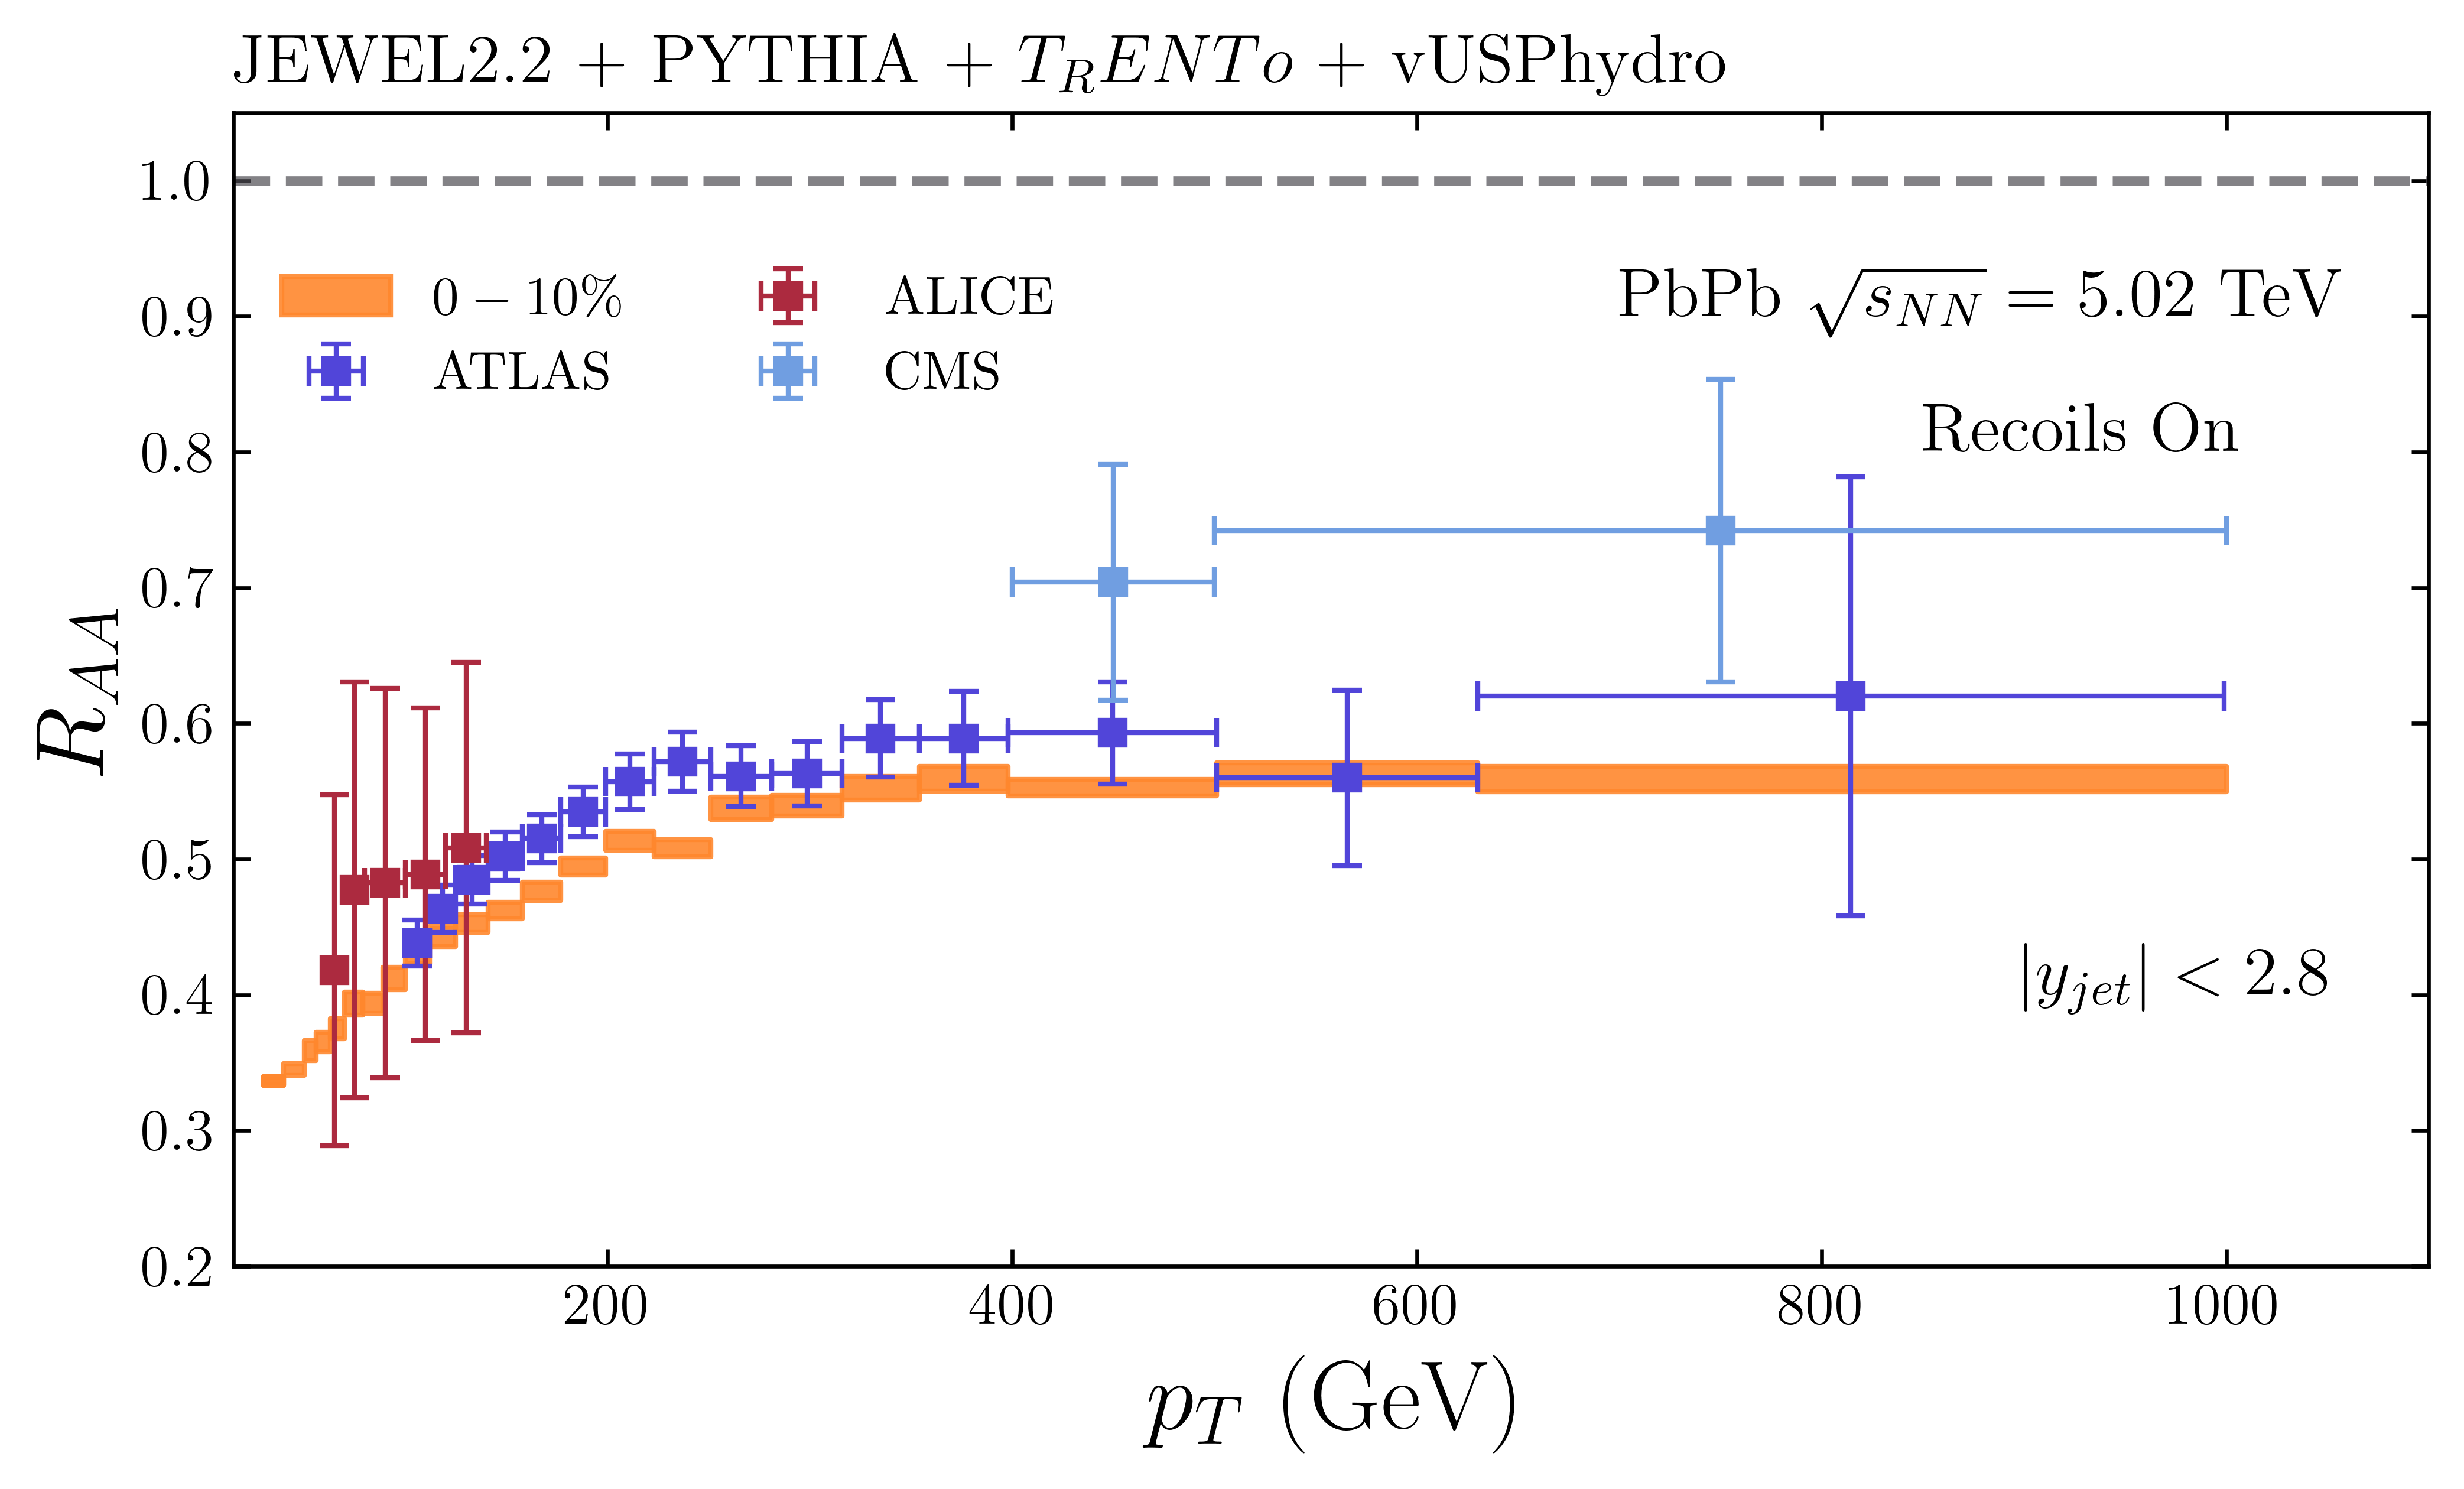

In [65]:
#R comparation vUSPhydro w/ rec using ALICE, CMS and ATLAS data
import yoda
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os



#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1
        #max = len(data.xVals()) - 1

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    
    return [x, y, err, errx]



def RAA(yodapp, yodaPbPb):
    
    obspp.append('/RAA_ATLAS/JetpT_0_2.1_R'+str(R))
    obs.append('/USPJWL_JETSPEC/JetpT_0_2.1_R'+str(R))
    
    histos_pp = [yoda.read(yodapp[i])]
    histos_PbPb = [yoda.read(yodaPbPb[i])]


    pp_jet = histos_pp[0][obs[i]]
    PbPb_jet = histos_PbPb[0][obs[i]]

    pp_evtc = histos_pp[0]['/_EVTCOUNT'].sumW()
    pp_xsec = histos_pp[0]['/_XSEC'].point(0).x()
    pp_jet.scaleW(pp_xsec / pp_evtc)


    PbPb_evtc = histos_PbPb[0]['/_EVTCOUNT'].sumW()
    PbPb_xsec = histos_PbPb[0]['/_XSEC'].point(0).x()
    PbPb_jet.scaleW(PbPb_xsec / PbPb_evtc)    

    raa = PbPb_jet / pp_jet


    x = np.asarray(raa.xVals())
    y = np.asarray(raa.yVals())
    yerr = np.asarray((raa.yMaxs() - raa.yMins()) / 2)
    xerr = np.asarray((raa.xMaxs() - raa.xMins()) / 2)                

    
    return [x, y, yerr, xerr]




plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`






            
#Plot dos dados experimentais            
ATLAS = DataFromExperiment('Data/ATLAS/ATLAS_0-10_502_raa.yoda', '/REF/ATLAS_2018_I1673184/d19-x01-y01')
plt.errorbar(*ATLAS, color='#5145d9', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ATLAS')       

ALICE = DataFromExperiment('Data/ALICE/HEPData-ins1755387-v2-Table_31.yoda', '/REF/ALICE_2019_I1755387/d31-x01-y01')
plt.errorbar(*ALICE, color='#ac2a3f', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='ALICE')       

CMS = DataFromExperiment('Data/CMS/HEPData-ins1848440-v1-Figure_7-3.yoda', '/REF/CMS_2021_I1848440/d10-x01-y01')
plt.errorbar(*CMS, color='#709ee1', fmt='s', ms=5, elinewidth = 1., capsize = 3, capthick = 1, label='CMS')       




R = 0.4

CENTS = '0-10'



yodapp.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/pp2_5020/pp220-5vT_raa_R0.4.yoda')
yodaPbPb.append('/home/monalisa/Desktop/Mestrado/RAA/Matplotlib_RAA/yoda_merge/vTj2-5Twrec/0-10_raa_R0.4.yoda')
    
obs.append('/USPJWL_JETSPEC/JetpT_R0.4')
    
    
arr = RAA(yodapp, yodaPbPb)

minpt = 0

for k in range(minpt, arr[0].size):
    xhigh = arr[0][k] + arr[3][k]
    xlow = arr[0][k] - arr[3][k]
    yhigh = arr[1][k] + arr[2][k]
    ylow = arr[1][k] - arr[2][k]
    if (k==0):
        plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#ff872d', label='$0-10\%$')

    plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.9, color='#ff872d')
            
            
    
    

    
    

# Define plot
plt.axhline(y=1.0, xmin=0., xmax=1200., alpha=0.7, color='#4f4d53', linestyle='--')

plt.figure(1, dpi = 1200)





# plt.errorbar(x, y, yerr, xerr, fmt='o')
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$p_{T}$ (GeV)')
plt.ylabel('$R_{AA}$')
plt.title('JEWEL2.2 + PYTHIA + $T_{R}ENTo$ + vUSPhydro', loc='left', fontsize = 14)

plt.text(700., 0.9, 'PbPb $\sqrt{s_{NN}} = 5.02$ TeV', fontsize = 14)
plt.text(900., 0.4,'$|y_{jet}|<2.8$', fontsize = 14)
plt.text(850., 0.8,'Recoils On', fontsize = 14)
plt.legend(ncol=2,loc=2,bbox_to_anchor=(0., 0.9))
plt.xlim(15., 1100.)
plt.ylim(0.2, 1.05)



# Save
#plt.savefig('./imagens/simple_raa_Rs.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Twrec_raa_0-10_datas.pdf')
plt.savefig('./Figures/5.02TeV/vTj2-5Twrec_raa_0-10_datas.png')


#Mostrar gráfico
plt.show()
 